In [15]:
#Import all relevant libraries
import numpy as np
import pandas as pd
# install the libaries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [ ]:
event_in_riyadh = pd.read_excel('Data/collected data/events_in_riyadh.xlsx')
event_from_webook = pd.read_csv('Data/collected data/event_data_webook_with_Latitude.csv')
platinumlist_activites = pd.read_csv('Data/collected data/event_data.csv')

In [ ]:
# concat the clening event
clean_event_in_riyadh = pd.read_csv('Data/clean data/event_in_riyadh_clean.csv')
clean_event_from_webook = pd.read_csv('Data/clean data/event_from_webook_clean.csv')
clean_event_from_platinumlist = pd.read_csv('Data/clean data/cleaned_data_platinumlist_activites.csv')
# Concatenate the DataFrames
all_clean_events = pd.concat([clean_event_in_riyadh, clean_event_from_webook, clean_event_from_platinumlist], ignore_index=True)

# reset the index
all_clean_events.reset_index(drop=True, inplace=True)


### Viewing the dataframe


#### platinumlist_event

In [ ]:
platinumlist_activites.head(2)

,names,price,date,location,description,location_url,type
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
1,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite


In [ ]:
platinumlist_activites.shape

(29, 7)

#### event_in_riyadh

In [ ]:
event_in_riyadh.head()
# name: Name of the event.
# price: The price for attending the event.
# date: Date of the event.
# location: The venue or location where the event will take place.
# description: A detailed description of the event.
# location_url: The Google Maps URL of the event location.
# type: The type or category of the event (e.g., conference, concert, workshop).
# url: The URL for booking tickets or viewing more details about the event.
# latitude: The latitude coordinate of the event location.
# longitude: The longitude coordinate of the event location.
# time: The time when the event is available or takes place.

,name,price,date,location,description,location_url,type,url
0,"فعالية ""بازار ريف""",N/n,\n13 رمضان - 22 رمضان\n\n9:00 م- 1:00 ص,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",https://www.google.com/maps/place/24%C2%B050'2...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...
1,ليالي كافد الرمضانية,N/n,04 رمضان - 29 رمضان\n\n5:00 م- 11:00 م,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,https://www.google.com/maps/place/24%C2%B046'0...,Exhibitions and festivals,https://kafdramadannights.com/
2,معرض فن المملكة,N/n,\n25 شعبان - 26 شوّال\n\n10:00 ص- 10:00 م,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",https://www.google.com/maps/place/24%C2%B044'4...,Exhibitions and festivals,https://x.com/MOCMuseums
3,مؤتمر قادة الموارد البشرية بالرياض,N/n,23 شوّال\n\n8:00 ص- 5:00 م,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",https://www.google.com/maps/place/24%C2%B039'5...,Exhibitions and festivals,https://ksa.hrleadersconference.com/
4,معرض أوتوميكانيكا الرياض,N/n,\n30 شوّال - 02 ذو القعدة\n\n2:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html


In [18]:
event_in_riyadh.shape

(16, 8)

#### Event from webook

In [84]:
event_from_webook.head()

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
0,منتزه الرمال الرياضي - مواقف الخيول,50,يومياً - 5 صباحاً الى 5 مساءً,منتزه الرمال الرياضي - المنطقة الشمالية,NaN,https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.946310,46.751760
1,سمار,NaN,09 مارس 2025 - 31 مارس 2025,"shqyiqa, Riyadh","اكتشف ""سمار"": وجهة فريدة تجمع بين الهندسة المع...",https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296
2,نادي النخيل للبولينج,80,26 فبراير 2025 - 10 يونيو 2025,"shqyiqa, Riyadh",الوجهة الاولى لمحبي البولينج عادت من جديد! ناد...,https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.713552,46.675296
3,Red Sand Dunes Adventure,547,02 مارس 2025 - 01 يونيو 2025,"shqyiqa, Riyadh",الكثبان الرملية: مغامرة تحت النجوم في قلب الصحراء,https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296
4,مغامرة بين الجبال,172.5,22 مارس - 22 مارس 2025,Hittin - Riyadh,انطلق في رحلة تتجاوز حدود الدروب مع رو إسكايبس...,https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.767852,46.576542


In [85]:
event_from_webook.shape

(79, 10)

#### all_clean_events

In [ ]:
all_clean_events.head()

,names,price,date,location,description,...,type,event_link,Latitude,Longitude,time
0,"فعالية ""بازار ريف""",0.0,13 رمضان - 22 رمضان,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252,9:00 م- 1:00 ص
1,ليالي كافد الرمضانية,0.0,04 رمضان - 29 رمضان,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375,5:00 م- 11:00 م
2,معرض فن المملكة,0.0,25 شعبان - 26 شوّال,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362,10:00 ص- 10:00 م
3,مؤتمر قادة الموارد البشرية بالرياض,0.0,23 شوّال,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",...,Exhibitions and festivals,https://ksa.hrleadersconference.com/,24.666637,46.696720,8:00 ص- 5:00 م
4,معرض أوتوميكانيكا الرياض,0.0,30 شوّال - 02 ذو القعدة,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html,24.753056,46.726772,2:00 م- 10:00 م


In [ ]:
all_clean_events.columns

Index(['names',
       'price',
       'date',
       'location',
       'description',
       'location_url',
       'type',
       'event_link',
       'Latitude',
       'Longitude',
       'time'],
      dtype='object')

In [ ]:
all_clean_events.shape

(119, 11)

## 1. Data Profiling:


### Data Quality Checks

**Here are typical steps involved in checking data quality:**

#### 1. Reliability:


event_in_riyadh : The data source of this dataset is ض Riyadh official website, proving its reliability.
event_from_webook : The data source of this dataset is Webook official website, proving its reliability.
platinumlist_event: The data is reliable scraped directly from platinumlist.

#### 2. Timeliness: 


This data was scrapped in March 15 th, 2025 which is the current period of interest for our problem. 

#### 3. Consistency: 


This data wasn't collected from a single source, but we will clean it to ensure consistency

#### 4. Relevance: 


- The data is appropriate for the problem statement because it was collected specifically from the event section on ض riyadh website and webook and platinumlist.

- We collected 10 essential features for the EDA and the model.

#### 5. Uniqueness: 



#### platinumlist_event

In [ ]:
platinumlist_activites.duplicated().sum()

In [ ]:
platinumlist_activites[platinumlist_activites.duplicated(keep=False)]

,names,price,date,location,description,location_url,type
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
1,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
2,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
3,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150 SAR,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,<p>يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال ...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite
6,فعالية رمالينا في الرياض,30 SAR,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite
9,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150 SAR,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,<p>يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال ...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite
15,فعالية رمالينا في الرياض,30 SAR,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite


In [ ]:
platinumlist_activites[['names']].duplicated().sum()

np.int64(5)

In [ ]:
platinumlist_activites[platinumlist_activites.duplicated(subset=['names'], keep=False)]

,names,price,date,location,description,location_url,type
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
1,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
2,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
3,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150 SAR,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,<p>يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال ...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite
6,فعالية رمالينا في الرياض,30 SAR,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite
9,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150 SAR,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,<p>يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال ...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite
13,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,NaN,الأحد 13 ابريل,كوميدي بود,<p>يأخذكم الكوميدي جون أشقر في رحلة مليئة بالم...,https://www.google.com/maps?q=QM57%2BRF+Al+Mur...,activite
14,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,NaN,السبت 12 ابريل,كوميدي بود,<p>يأخذكم الكوميدي جون أشقر في رحلة مليئة بالم...,https://www.google.com/maps?q=QM57%2BRF+Al+Mur...,activite
15,فعالية رمالينا في الرياض,30 SAR,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite


##### event_in_riyadh

In [ ]:
event_in_riyadh.duplicated().sum()

0

In [ ]:
event_in_riyadh['name'].duplicated().sum()

0

##### event from weBook

In [74]:
event_from_webook.duplicated().sum()

0

In [75]:
event_from_webook['names'].duplicated().sum()

0

##### all clean event

In [ ]:
all_clean_events.duplicated().sum()

0

In [ ]:
all_clean_events['names'].duplicated().sum()

2

In [ ]:
all_clean_events[all_clean_events['names'].duplicated(keep=False)]
# drop index 2 Because the information in 61 is correct.
# same event but in deffrent date 

,names,price,date,location,description,...,type,event_link,Latitude,Longitude,time
2,معرض فن المملكة,0.0,25 شعبان - 26 شوّال,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362,10:00 ص- 10:00 م
61,معرض فن المملكة,25.0,الإثنين إلى الخميس: من الساعة 10:00 صباحًا حتى...,الصالة المؤقتة للمتحف السعودي للفن المعاصر في ...,unknown,...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.745560,46.535180,NaN
105,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,200.0,الأحد 13 ابريل,كوميدي بود,يأخذكم الكوميدي جون أشقر في رحلة مليئة بالمشاع...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.759684,46.663690,NaN
106,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,200.0,السبت 12 ابريل,كوميدي بود,يأخذكم الكوميدي جون أشقر في رحلة مليئة بالمشاع...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.759811,46.663645,NaN


In [ ]:
all_clean_events['names'].duplicated().sum()

1

#### 6. Completeness: 


#### platinumlist_event

In [ ]:
platinumlist_activites.isnull().sum().sort_values(ascending=False)

date            11
location         6
price            3
description      3
location_url     3
names            0
type             0
dtype: int64

##### event_in_riyadh

In [ ]:
event_in_riyadh.isnull().sum()

name            0
price           0
date            0
location        0
description     0
location_url    0
type            0
    url         0
dtype: int64

In [ ]:
# adding Latitude and Longitude from location url
event_in_riyadh['location_url'][0]

"https://www.google.com/maps/place/24%C2%B050'28.9%22N+46%C2%B043'59.7%22E/@24.8413476,46.7332522,17z/data=!3m1!4b1!4m4!3m3!8m2!3d24.8413476!4d46.7332522?hl=ar&entry=ttu&g_ep=EgoyMDI1MDMxMC4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D"

In [ ]:
# after adding Latitude and Longitude from location url
event_in_riyadh.head(2)

,name,price,date,location,description,location_url,type,url,latitude,longitude
0,"فعالية ""بازار ريف""",N/n,\n13 رمضان - 22 رمضان\n\n9:00 م- 1:00 ص,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",https://www.google.com/maps/place/24%C2%B050'2...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252
1,ليالي كافد الرمضانية,N/n,04 رمضان - 29 رمضان\n\n5:00 م- 11:00 م,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,https://www.google.com/maps/place/24%C2%B046'0...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375


In [ ]:
event_in_riyadh['latitude'].isnull().sum()

4

In [ ]:
# clean the null 
event_in_riyadh[event_in_riyadh['latitude'].isnull()]

,name,price,date,location,description,location_url,type,url,latitude,longitude
5,معرض السيارات الكهربائية,N/n,\n06 ذو القعدة - 08 ذو القعدة\n\n5:00 م- 9:00 م,واجهة الرياض للمعارض والمؤتمرات,يسلط المعرض معرض السيارات الكهربائية الضوء عل...,https://www.google.com//maps/search/24.8356676...,Exhibitions and festivals,https://evs-saudi.com/,NaN,NaN
11,معرض الغذاء السعودي 2025,N/n,\n23 شوّال - 26 شوّال\n\n4:00 م- 11:00 م,واجهة الرياض للمعارض والمؤتمرات,ينطلق معرض الغذاء السعودي (Saudi Food Show)، ف...,https://www.google.com//maps/search/24.8356676...,Exhibitions and festivals,https://www.saudifoodexpo.com/ar/,NaN,NaN
14,منتدى الاستثمار الرياضي,N/n,09 شوّال - 11 شوّال\n\n9:00 ص- 3:00 م,فندق الريتز-كارلتون، الرياض,أعلنت وزارتا الرياضة والاستثمار، تدشين منتدى ا...,https://www.google.com//maps/search/24.6657833...,Exhibitions and festivals,https://saudisf.com/ar/,NaN,NaN
15,معرض سعودي فود,N/n,\n14 ذو القعدة - 16 ذو القعدة\n\n2:00 م- 10:00 م,واجهة الرياض للمعارض والمؤتمرات,يجمع معرض سعودي فود مجموعة فريدة من الشركات ال...,https://www.google.com//maps/search/24.8356676...,Exhibitions and festivals,https://www.thesaudifoodshow.com/ar,NaN,NaN


In [ ]:
# after cleaning 
event_in_riyadh['latitude'].isnull().sum()

0

In [ ]:
event_in_riyadh[event_in_riyadh['price'] == 'N/n']

,name,price,date,location,description,location_url,type,url,latitude,longitude
0,"فعالية ""بازار ريف""",N/n,\n13 رمضان - 22 رمضان\n\n9:00 م- 1:00 ص,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",https://www.google.com/maps/place/24%C2%B050'2...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252
1,ليالي كافد الرمضانية,N/n,04 رمضان - 29 رمضان\n\n5:00 م- 11:00 م,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,https://www.google.com/maps/place/24%C2%B046'0...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375
2,معرض فن المملكة,N/n,\n25 شعبان - 26 شوّال\n\n10:00 ص- 10:00 م,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",https://www.google.com/maps/place/24%C2%B044'4...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362
3,مؤتمر قادة الموارد البشرية بالرياض,N/n,23 شوّال\n\n8:00 ص- 5:00 م,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",https://www.google.com/maps/place/24%C2%B039'5...,Exhibitions and festivals,https://ksa.hrleadersconference.com/,24.666637,46.696720
4,معرض أوتوميكانيكا الرياض,N/n,\n30 شوّال - 02 ذو القعدة\n\n2:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html,24.753056,46.726772
5,معرض السيارات الكهربائية,N/n,\n06 ذو القعدة - 08 ذو القعدة\n\n5:00 م- 9:00 م,واجهة الرياض للمعارض والمؤتمرات,يسلط المعرض معرض السيارات الكهربائية الضوء عل...,https://www.google.com//maps/search/24.8356676...,Exhibitions and festivals,https://evs-saudi.com/,24.835668,46.729394
6,معرض مشروعات السعودية,N/n,07 ذو القعدة - 09 ذو القعدة\n\n3:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,الدورة الأولى من المعرض العام الماضي كانت حدثً...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://www.saudiprojectshow.com/,24.753056,46.726772
7,معرض الفنادق والضيافة بالمملكة العربية السعودية,N/n,10 شوّال - 12 شوّال\n\n2:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,على مدار أكثر من عقد من الزمان، نجح معرض الفنا...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://ar.thehotelshowsaudiarabia.com/,24.753056,46.726772
8,معرض سعودي فود للتصنيع,N/n,15 شوّال - 17 شوّال\n\n2:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,معرض سعودي فود للتصنيع يوفر فرصة الاطلاع على ر...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://www.saudifoodmanufacturing.com/,24.753056,46.726772
9,مؤتمر مبادرة القدرات البشرية 2025,N/n,15 شوّال - 16 شوّال\n\n9:30 ص- 5:30 م,مركز الملك عبدالعزيز الدولي للمؤتمرات، الرياض,أول مؤتمر عالمي يركز على تنمية القدرات البشرية...,https://www.google.com/maps/place/24%C2%B040'0...,Exhibitions and festivals,https://humancapabilityinitiative.org/ar/,24.667463,46.633467


In [ ]:
#after fill the null with 0 
event_in_riyadh[event_in_riyadh['price'] == 'N/n']

,name,price,date,location,description,location_url,type,url,latitude,longitude


In [19]:
# split date and time  the data
event_in_riyadh['date']

0              \n13 رمضان - 22 رمضان\n\n9:00 م- 1:00 ص
1               04 رمضان - 29 رمضان\n\n5:00 م- 11:00 م
2            \n25 شعبان - 26 شوّال\n\n10:00 ص- 10:00 م
3                           23 شوّال\n\n8:00 ص- 5:00 م
4         \n30 شوّال - 02 ذو القعدة\n\n2:00 م- 10:00 م
5      \n06 ذو القعدة - 08 ذو القعدة\n\n5:00 م- 9:00 م
6       07 ذو القعدة - 09 ذو القعدة\n\n3:00 م- 10:00 م
7               10 شوّال - 12 شوّال\n\n2:00 م- 10:00 م
8               15 شوّال - 17 شوّال\n\n2:00 م- 10:00 م
9                15 شوّال - 16 شوّال\n\n9:30 ص- 5:30 م
10              16 شوّال - 18 شوّال\n\n3:00 م- 10:00 م
11            \n23 شوّال - 26 شوّال\n\n4:00 م- 11:00 م
12           \n23 شوّال - 24 شوّال\n\n9:00 ص- 5:00 م\n
13               23 شوّال - 25 شوّال\n\n3:00 ص- 3:00 ص
14               09 شوّال - 11 شوّال\n\n9:00 ص- 3:00 م
15    \n14 ذو القعدة - 16 ذو القعدة\n\n2:00 م- 10:00 م
Name: date, dtype: object

In [ ]:
# affter split and add the time in colume time 
event_in_riyadh['date']

0             13 رمضان - 22 رمضان
1             04 رمضان - 29 رمضان
2             25 شعبان - 26 شوّال
3                        23 شوّال
4         30 شوّال - 02 ذو القعدة
5     06 ذو القعدة - 08 ذو القعدة
6     07 ذو القعدة - 09 ذو القعدة
7             10 شوّال - 12 شوّال
8             15 شوّال - 17 شوّال
9             15 شوّال - 16 شوّال
10            16 شوّال - 18 شوّال
11            23 شوّال - 26 شوّال
12            23 شوّال - 24 شوّال
13            23 شوّال - 25 شوّال
14            09 شوّال - 11 شوّال
15    14 ذو القعدة - 16 ذو القعدة
Name: date, dtype: object

In [ ]:
event_in_riyadh['time']

0       9:00 م- 1:00 ص
1      5:00 م- 11:00 م
2     10:00 ص- 10:00 م
3       8:00 ص- 5:00 م
4      2:00 م- 10:00 م
5       5:00 م- 9:00 م
6      3:00 م- 10:00 م
7      2:00 م- 10:00 م
8      2:00 م- 10:00 م
9       9:30 ص- 5:30 م
10     3:00 م- 10:00 م
11     4:00 م- 11:00 م
12      9:00 ص- 5:00 م
13      3:00 ص- 3:00 ص
14      9:00 ص- 3:00 م
15     2:00 م- 10:00 م
Name: time, dtype: object

##### event from webook

In [86]:
event_from_webook.isnull().sum()

names            0
price            6
date             0
location         3
description     28
location_url     3
type             0
url              0
Latitude         3
Longitude        3
dtype: int64

In [77]:
# get the name from the description
event_from_webook[event_from_webook['names'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
34,NaN,99,يومياً من 5:00 مساءاً,NaN,حياكم في هاوس أوف هايب، حيث يلتقي الواقع بعوال...,NaN,experience,https://webook.com/ar/events/mdl-beast-gun-n-r...,NaN,NaN


In [79]:
# after get the name from the description
event_from_webook[event_from_webook['names'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude


In [87]:
event_from_webook.isnull().sum()

names            0
price            6
date             0
location         3
description     28
location_url     3
type             0
url              0
Latitude         3
Longitude        3
dtype: int64

In [ ]:
# check the price from the website and add it 
event_from_webook[event_from_webook['price'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
1,سمار,NaN,09 مارس 2025 - 31 مارس 2025,"shqyiqa, Riyadh","اكتشف ""سمار"": وجهة فريدة تجمع بين الهندسة المع...",https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296
30,لوكا بارك,NaN,01 مارس 2025 - 30 مارس 2025,لوكا بارك,لوكا بارك هي أول حديقة للكلاب في المملكة العرب...,https://www.google.com/maps/search/?api=1&quer...,experience,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.634886,46.672779
66,ورش عمل الطريف,NaN,15 يناير - 29 مارس | 21:00 - 1:00 كل اربعاء - ...,حي الطّريف التاريخي,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.733717,46.573885
77,أهل الحي والقصائد الحية,NaN,15 يناير - 31 مارس | 21:30 الى 1:00 | الخميس،...,حي الطّريف التاريخي,مجموعة تجسّد دور أهل الطريف، يشاركون حقائق حول...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.733717,46.573885
78,ذاكرة الدرعية,NaN,15 يناير - 28 مارس | 21:00 - 1:00 | الاربعاء،...,حي الطّريف التاريخي,هو عرض تفاعلي مسرحي يتحدث عن قصة الدرعية. سيأخ...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.733717,46.573885
79,الخيل العربي,NaN,15 يناير - 31 مارس | 20:30 - 1:00 | الخميس وال...,حي الطّريف التاريخي,تسليط الضوء على جمال وأهمية الخيل العربي الاصي...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.733717,46.573885


In [93]:
# after check the price from the website and add it 
event_from_webook[event_from_webook['price'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude


In [94]:
event_from_webook.isnull().sum()

names            0
price            0
date             0
location         3
description     28
location_url     3
type             0
url              0
Latitude         3
Longitude        3
dtype: int64

In [ ]:
# mising location ,location_url ,Latitude and Longitude are same rows
# check the location from the website
event_from_webook[event_from_webook['location'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
34,هاوس أوف هايب,99,يومياً من 5:00 مساءاً,NaN,حياكم في هاوس أوف هايب، حيث يلتقي الواقع بعوال...,NaN,experience,https://webook.com/ar/events/mdl-beast-gun-n-r...,NaN,NaN
39,MDLBeast: Guns N' Roses,179,23 مايو 2025 - 23 مايو 2025,NaN,NaN,NaN,music,https://webook.com/ar/events/thousand-and-one-...,NaN,NaN
53,السعودية ضد الصين,20,20 مارس - 20 مارس 2025,NaN,NaN,NaN,sport,https://webook.com/ar/events/thousand-and-one-...,NaN,NaN


In [111]:
#after check and clean the location from the website
event_from_webook[event_from_webook['location'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude


In [113]:
event_from_webook.isnull().sum()

names            0
price            0
date             0
location         0
description     28
location_url     0
type             0
url              0
Latitude         0
Longitude        0
dtype: int64

In [114]:
event_from_webook[event_from_webook['description'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
0,منتزه الرمال الرياضي - مواقف الخيول,50,يومياً - 5 صباحاً الى 5 مساءً,منتزه الرمال الرياضي - المنطقة الشمالية,NaN,https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.946310,46.751760
39,MDLBeast: Guns N' Roses,179,23 مايو 2025 - 23 مايو 2025,مسرح محمد عبده,NaN,https://www.google.com/maps/place/مسرح+محمد+عب...,music,https://webook.com/ar/events/thousand-and-one-...,24.769219,46.604840
40,ألف وواحد,369,تبدأ الفعالية الساعة 4 مساءً إلى الساعة 4 صباح...,بنبان - الرياض,NaN,https://www.google.com/maps/search/?api=1&quer...,music,https://webook.com/ar/events/mdl-beast-gun-n-r...,25.028510,46.579740
41,مسكون ليلى,805,01 أبريل 2025 - 03 أبريل 2025,"مسرح محمد العلي, بوليفارد سيتي",NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.769298,46.606217
42,عروض الكوميديا ون مايك,115,اسبوعيا,ون مايك,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.809330,46.619082
44,خيمة ليالينا في الريتز كارلتون,575,الإفطار: من 5:00 مساءً إلى 9:00 مساءً - السحور...,الريتز كارلتون، الرياض,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.667092,46.628630
45,عباية إكسبو,35,12 مارس 2025 - 16 مارس 2025,عبية نجد,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.784920,46.569042
46,معرض فن المملكة,25,الإثنين إلى الخميس: من الساعة 10:00 صباحًا حتى...,الصالة المؤقتة للمتحف السعودي للفن المعاصر في ...,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.745560,46.535180
47,ليلة وش السالفة ليلة ارتجال - كوميدي بود,45,كل سبت | 8 مساءاً الى 10 مساءاً,كوميدي بود,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.759610,46.663730
48,ليلة هات وخذ - عرض ألعاب ارتجالية في كوميدي بود,75,كل اربعاء و سبت | 8 مساءاً الى 10 مساءاً,كوميدي بود,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.759610,46.663730


In [117]:
# after fill the null in description
event_from_webook[event_from_webook['description'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude


In [ ]:
# check the time with team 
event_from_webook['date'].value_counts()

date
09 مارس 2025 - 30 مارس 2025                                          7
15 أكتوبر |  من 5:00 مساءًا                                          5
12 مارس 2025 - 30 يونيو 2025                                         4
15 أكتوبر |  من 4:00 مساءًا                                          3
08 مارس 2025 - 04 أبريل 2025                                         3
                                                                    ..
13 أكتوبر | من 5 مساءاً                                              1
13 أكتوبر 2024 - 05:00 م                                             1
23 مايو 2025 - 23 مايو 2025                                          1
01 أبريل 2025 - 03 أبريل 2025                                        1
15 يناير - 31 مارس | 20:30 - 1:00 | الخميس والجمعة والسبت أسبوعيا    1
Name: count, Length: 56, dtype: int64

##### all clean event

In [ ]:
all_clean_events.duplicated().sum()

0

In [ ]:
all_clean_events['names'].duplicated().sum()

2

In [ ]:
all_clean_events[all_clean_events['names'].duplicated(keep=False)]
# drop index 2 Because the information in 61 is correct.
# same event but in deffrent date 

,names,price,date,location,description,...,type,event_link,Latitude,Longitude,time
2,معرض فن المملكة,0.0,25 شعبان - 26 شوّال,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362,10:00 ص- 10:00 م
61,معرض فن المملكة,25.0,الإثنين إلى الخميس: من الساعة 10:00 صباحًا حتى...,الصالة المؤقتة للمتحف السعودي للفن المعاصر في ...,unknown,...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.745560,46.535180,NaN
105,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,200.0,الأحد 13 ابريل,كوميدي بود,يأخذكم الكوميدي جون أشقر في رحلة مليئة بالمشاع...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.759684,46.663690,NaN
106,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,200.0,السبت 12 ابريل,كوميدي بود,يأخذكم الكوميدي جون أشقر في رحلة مليئة بالمشاع...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.759811,46.663645,NaN


In [ ]:
all_clean_events['names'].duplicated().sum()

1

##### all clean event

In [ ]:
all_clean_events.isnull().sum().sort_values(ascending=False)
# drop time 

time            103
Latitude          4
Longitude         4
names             0
price             0
               ... 
location          0
description       0
location_url      0
type              0
event_link        0
Length: 11, dtype: int64

In [ ]:
#after drop time
all_clean_events.isnull().sum().sort_values(ascending=False)

Latitude        4
Longitude       4
names           0
price           0
date            0
location        0
description     0
location_url    0
type            0
event_link      0
dtype: int64

In [ ]:
all_clean_events[all_clean_events['Latitude'].isnull()]
# drop all 

,names,price,date,location,description,location_url,type,event_link,Latitude,Longitude
109,ورشة الخط العربي في الرياض,65.00,الجمعة 14 مارس,ليفل اب - سوشال هاب,الورشة هي مكان تتعلم فيه مهارات جديدة أو تطور ...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,NaN,NaN
110,جولة ليوم كامل في مدينة الرياض مع وجبة غداء,332.18,الاثنين والأربعاء والخميس والسبت,Not Available,رحلة عبر التاريخ والثقافة والحداثة، من المتحف ...,Not Available,activite,https://riyadh.platinumlist.net/ar/event-ticke...,NaN,NaN
111,"""حافة العالم"" مع عشاء",1305.53,متاحة يوميًا,Not Available,انطلق في مغامرة شيقة مع جولة على حافة العالم ف...,Not Available,activite,https://riyadh.platinumlist.net/ar/event-ticke...,NaN,NaN
112,الرياض: جولة موجّهة لمدة نصف يوم مع اصطحاب من ...,139.05,الاثنين والأربعاء والخميس والسبت,Not Available,"Begin a guided half-day tour in Riyadh, starti...",Not Available,activite,https://riyadh.platinumlist.net/ar/event-ticke...,NaN,NaN


In [ ]:
all_clean_events[all_clean_events['Latitude'].isnull()]

,names,price,date,location,description,location_url,type,event_link,Latitude,Longitude


In [ ]:
# after drop the null in Latitude
all_clean_events.isnull().sum().sort_values(ascending=False)

names                   0
price                   0
date                    0
location                0
description             0
                       ..
type                    0
event_link              0
Latitude                0
Longitude               0
nearest_neighborhood    0
Length: 11, dtype: int64

#### 7. Check Accuracy:


#### platinumlist_event

##### Data Format

In [ ]:
platinumlist_activites.dtypes

names           object
price           object
date            object
location        object
description     object
location_url    object
type            object
dtype: object

In [ ]:
platinumlist_activites.dtypes

names            object
price           float64
date             object
location         object
description      object
location_url     object
type             object
event_link       object
dtype: object

###### event_in_riyadh

In [ ]:
event_in_riyadh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16 non-null     object 
 1   price         16 non-null     float64
 2   date          16 non-null     object 
 3   location      16 non-null     object 
 4   description   16 non-null     object 
 5   location_url  16 non-null     object 
 6   type          16 non-null     object 
 7       url       16 non-null     object 
 8   latitude      16 non-null     float64
 9   longitude     16 non-null     float64
 10  time          16 non-null     object 
dtypes: float64(3), object(8)
memory usage: 1.5+ KB


###### event from webook

In [197]:
event_from_webook.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 79
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   names         79 non-null     object 
 1   price         79 non-null     float64
 2   date          79 non-null     object 
 3   location      79 non-null     object 
 4   description   79 non-null     object 
 5   location_url  79 non-null     object 
 6   type          79 non-null     object 
 7   url           79 non-null     object 
 8   Latitude      79 non-null     float64
 9   Longitude     79 non-null     float64
dtypes: float64(3), object(7)
memory usage: 8.8+ KB


###### all clean event

In [ ]:
all_clean_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   names                 114 non-null    object 
 1   price                 114 non-null    float64
 2   date                  114 non-null    object 
 3   location              114 non-null    object 
 4   description           114 non-null    object 
 5   location_url          114 non-null    object 
 6   type                  114 non-null    object 
 7   event_link            114 non-null    object 
 8   Latitude              114 non-null    float64
 9   Longitude             114 non-null    float64
 10  nearest_neighborhood  114 non-null    object 
dtypes: float64(3), object(8)
memory usage: 10.7+ KB


##### Outlier

###### event_in_riyadh

In [208]:
event_in_riyadh.describe().T

,count,mean,std,min,25%,50%,75%,max
price,16.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
latitude,16.0,24.761775,0.059315,24.665783,24.751239,24.753056,24.815050,24.841348
longitude,16.0,46.696323,0.056297,46.535362,46.683634,46.726772,46.727428,46.733252


In [209]:
event_in_riyadh.describe(include='object').T

,count,unique,top,freq
name,16,16,"فعالية ""بازار ريف""",1
date,16,16,13 رمضان - 22 رمضان,1
location,16,9,مركز الرياض الدولي للمؤتمرات والمعارض,6
description,16,16,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",1
location_url,16,9,https://www.google.com/maps/place/24%C2%B045'1...,6
type,16,1,Exhibitions and festivals,16
url,16,16,https://x.com/ReefSaudi/status/189878483059619...,1
time,16,12,2:00 م- 10:00 م,4


###### event from webook

In [210]:
event_from_webook.describe().T

,count,mean,std,min,25%,50%,75%,max
price,79.0,524.936709,1633.215651,0.00000,72.500000,130.000000,367.000000,11500.000000
Latitude,79.0,24.751612,0.100277,24.37700,24.741793,24.759610,24.772733,25.028510
Longitude,79.0,46.593054,0.145632,45.92174,46.572714,46.599469,46.661994,46.785044


In [211]:
event_from_webook.describe().T

,count,mean,std,min,25%,50%,75%,max
price,79.0,524.936709,1633.215651,0.00000,72.500000,130.000000,367.000000,11500.000000
Latitude,79.0,24.751612,0.100277,24.37700,24.741793,24.759610,24.772733,25.028510
Longitude,79.0,46.593054,0.145632,45.92174,46.572714,46.599469,46.661994,46.785044


###### all clean event

In [ ]:
all_clean_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   names                 114 non-null    object 
 1   price                 114 non-null    float64
 2   date                  114 non-null    object 
 3   location              114 non-null    object 
 4   description           114 non-null    object 
 5   location_url          114 non-null    object 
 6   type                  114 non-null    object 
 7   event_link            114 non-null    object 
 8   Latitude              114 non-null    float64
 9   Longitude             114 non-null    float64
 10  nearest_neighborhood  114 non-null    object 
dtypes: float64(3), object(8)
memory usage: 10.7+ KB


###### all clean event

In [ ]:
all_clean_events.describe().T

,count,mean,std,min,25%,50%,75%,max
price,114.0,387.683158,1373.735461,0.000000,41.250000,100.00000,237.500000,11500.00000
Latitude,114.0,24.727670,0.330295,21.365809,24.741822,24.75961,24.772733,25.02851
Longitude,114.0,46.555995,0.607931,40.280285,46.573977,46.60700,46.674666,46.79553


In [ ]:
all_clean_events.describe(include='object').T

,count,unique,top,freq
names,114,113,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,2
date,114,84,09 مارس 2025 - 30 مارس 2025,7
location,114,56,بوليفارد وورلد,14
description,114,84,unknown,28
location_url,114,59,https://www.google.com/maps/search/?api=1&quer...,14
type,114,6,experience,30
event_link,114,37,https://webook.com/ar/events/mdl-beast-gun-n-r...,40
nearest_neighborhood,114,23,Al ‘Aqiq,49


## 2. Data Cleaning: 


#### platinumlist_event

### Duplicated Cleaning

In [ ]:
platinumlist_activites = platinumlist_activites.drop_duplicates()

In [ ]:
platinumlist_activites[platinumlist_activites.duplicated(keep=False)]

,names,price,date,location,description,location_url,type


### Cleaning Nulls

In [ ]:
platinumlist_activites.isnull().sum().sort_values(ascending=False)

date            11
location         6
price            3
description      3
location_url     3
names            0
type             0
dtype: int64

In [ ]:
platinumlist_activites[platinumlist_activites['date'].isnull()]

,names,price,date,location,description,location_url,type
1,رمضان مع مكتبة الأشجار في الرياض,200 SAR,NaN,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
19,جولة ليوم كامل في مدينة الرياض مع وجبة غداء,332.18 SAR,NaN,NaN,NaN,NaN,activite
20,"""حافة العالم"" مع عشاء","1,305.53 SAR",NaN,NaN,NaN,NaN,activite
21,الرياض: جولة موجّهة لمدة نصف يوم مع اصطحاب من ...,139.05 SAR,NaN,NaN,"Begin a guided half-day tour in Riyadh, starti...",NaN,activite
22,ليفل أب الرياض,60 SAR,NaN,ليفل اب - سوشال هاب,LEVEL UP ليس مجرد مكان للألعاب الاجتماعية، بل ...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite
23,لعبة الطاولة أيام الاثنين,45 SAR,NaN,ليفل اب - سوشال هاب,<p>كل يوم اثنين نتجمع في إثنينية لعب </p><p>ف...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite
24,باتل كارت - الرياض,120 SAR,NaN,باتل كارت,NaN,https://www.google.com/maps?q=RQ2W%2BQ6R+Ishbi...,activite
25,ليلة الألعاب الاجتماعية | ماريو كارت,NaN,NaN,ليفل اب - سوشال هاب,انضموا إلينا في تجربة ممتعة ومليئة بالألفة في ...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite
26,دكة ليفل أب,75 SAR,NaN,ليفل اب - سوشال هاب,جلسة خارجية بتجمع بين الأجواء الرمضانية الجميل...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite
27,ألعاب قصيرة مستوحاة من أجواء رمضان في الرياض,55 SAR,NaN,ليفل اب - سوشال هاب,استعدوا للاستمتاع بحدث ألعاب سريعة بطابع رمضان...,https://www.google.com/maps?q=LEVEL+UP+Social+...,activite


In [ ]:
#date
platinumlist_activites.at[1, 'date'] = '9 - 27 مارس'

indices_to_update = [22, 23, 26, 27,28]  # Example row indices
platinumlist_activites.loc[indices_to_update, 'date'] = 'Not Available'

platinumlist_activites.at[24, 'date'] = 'الثلاثاء 20 فبراير–الثلاثاء 1 ابريل'
platinumlist_activites.at[20, 'date'] = 'متاحة يوميًا'
platinumlist_activites.at[19, 'date'] = ' الاثنين والأربعاء والخميس والسبت'
platinumlist_activites.at[21, 'date'] = ' الاثنين والأربعاء والخميس والسبت'
#location
indices_to_update = [19,20,21]  # Example row indices
platinumlist_activites.loc[indices_to_update, 'location'] = 'Not Available'
platinumlist_activites.at[10, 'location'] = 'لو كونتوار'
platinumlist_activites.at[8, 'location'] = 'الريتز كارلتون'
platinumlist_activites.at[11, 'location'] = 'الرياض سيتي'
#price
indices_to_update = [13,14]  # Example row indices
platinumlist_activites.loc[indices_to_update, 'price'] = '200 SAR'
# description

platinumlist_activites.at[19, 'description'] = 'رحلة عبر التاريخ والثقافة والحداثة، من المتحف الوطني إلى برج المملكة'
platinumlist_activites.at[20, 'description'] = 'انطلق في مغامرة شيقة مع جولة على "حافة العالم" في الرياض، حيث ستخوض رحلة مثيرة إلى منحدر طويق الرائع الذي يمتد لمسافة تبلغ 1000 كيلومتر. ستقدم لك هذه الرحلة المدهشة فرصة استكشاف نقاط الرؤية الشاهقة التي ترتفع حتى 300 مترًا، مما يجعلك تتمكن من المشي على طول هذه الجدران الجبلية الساحرة والانغماس في المناظر الطبيعية الرائعة التي تقدمها. وأثناء استكشافك لهذه العجائب الطبيعية، ستكون لديك أيضًا فرصة للتعرف على الثقافة السعودية من خلال المشاركة في مراسم تقديم القهوة والشاي التقليدية، بالإضافة إلى الاستمتاع بوجبة خفيفة لذيذة'
#platinumlist_activites.at[21, 'description']='Begin a guided half-day tour in Riyadh, starting with a visit to the historic Dirah Souq downtown, where you will explore Saudi heritage treasures, and antique carpets, and enjoy the enticing scents of sandalwood. Witness lively auctions and discover a variety of men clothing. Afterward, your tour includes a visit to the nearby Masmak Fort, a pivotal site in the establishment of modern Saudi Arabia, where King Abdulaziz seized control in 1902, all conveniently with hotel pick-up included'
platinumlist_activites.at[24, 'description'] ='اتل كارت هي أول سيارات سباق كارتنغ حقيقي في العالم بمزيج ألعاب الفيديو جيم، والواقع المعزز. تخيل مجموعة مختلفة من أنواع الألعاب التي تنقل السباق إلى حرب والسيارة تطلق صواريخ لإيقاف الاعبين الأخرين، غير الأسلحة الأخرى مثل النيتروس، قنابل، و برميل الزيت. مزيد من أنواع الألعاب المختلفة متاحة مثل كرة قدم بالسيارة، لعبت الثعبان، و كثير من الألعاب الأخرى. جاهزين للتحدي؟'
#location_url
indices_to_update = [19,20,21]  # Example row indices
platinumlist_activites.loc[indices_to_update, 'location_url'] = 'Not Available'

#row
platinumlist_activites = platinumlist_activites.drop(index=25)


In [ ]:
platinumlist_activites

,names,price,date,location,description,location_url,type
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230 SAR,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,<p>انضموا إلينا لتجربة ملهمة في حصص الاسترخاء ...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite
1,رمضان مع مكتبة الأشجار في الرياض,200 SAR,9 - 27 مارس,أيون كوليكتيف,<strong>رفاهية رمضان في مكتبة الشجرة | 9 - 27 ...,https://www.google.com/maps?q=Aeon+Collective%...,activite
4,سمار 2025 في الرياض,40 SAR,الجمعة 14 مارس - الإثنين 31 مارس,العمارية - الرياض,<p><strong>شتاك أدفى في سمار!<br/><br/></stron...,https://www.google.com/maps?q=%D8%B3%D9%85%D8%...,activite
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150 SAR,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,<p>يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال ...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite
6,فعالية رمالينا في الرياض,30 SAR,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite
7,حكاوي العمارية في الرياض,17 SAR,الجمعة 14 مارس - الإثنين 31 مارس,منتجع رتق,إن فعالية حكاوي الترفيهية المقدمة للعائلات نسا...,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7...,activite
8,خيمة ليالينا في الريتز كارلتون الرياض,186.88 SAR,الجمعة 14 مارس - الأحد 16 مارس,الريتز كارلتون,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة...,https://www.google.com/maps?q=Al+Hada&z=17,activite
10,فطور رمضان الفاخر في لو كونتوار في الرياض,180 SAR,الجمعة 14 مارس - الإثنين 31 مارس,لو كونتوار,<p>هذا العام ندعوكم لتجربة فريدة من نوعها خلال...,https://www.google.com/maps?q=QMJW%2BJW+At+Taa...,activite
11,ألف وواحد في الرياض,369 SAR,الخميس 24 ابريل - الجمعة 25 ابريل,الرياض سيتي,<p>على نغمةٍ ساحرة، تنتظركم تجربة فريدة من نوع...,"https://www.google.com/maps?q=24.9986970,46.49...",activite
12,يلوبلس يقدم حفل ريكوندايت في الرياض,299 SAR,الجمعة 11 ابريل,المدينة الإعلامية السعودية,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوند...,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al...,activite


In [ ]:
platinumlist_activites.isnull().sum().sort_values(ascending=False)

names           0
price           0
date            0
location        0
description     0
location_url    0
type            0
dtype: int64

In [ ]:
platinumlist_activites.shape

(24, 7)

In [ ]:
manual_links = [
    "https://riyadh.platinumlist.net/ar/event-tickets/96289/rooftop-wellness-garden-at-kafd",
    "https://riyadh.platinumlist.net/ar/event-tickets/98217/ramadan-tree-library",
    'https://riyadh.platinumlist.net/ar/event-tickets/smar',
    'https://riyadh.platinumlist.net/ar/event-tickets/98144/executives-kafd-ramadan-nights-in-riyadh', 'https://riyadh.platinumlist.net/ar/event-tickets/97054/ramlina-event-in-riyadh',
    'https://riyadh.platinumlist.net/ar/event-tickets/95832/hakawi','https://riyadh.platinumlist.net/ar/event-tickets/98113/layalina-tent-by-the-ritz-carlton-riyadh','https://riyadh.platinumlist.net/ar/event-tickets/98109/luxurious-ramadan-fotor-at-le-comptoir',
    'https://riyadh.platinumlist.net/ar/event-tickets/98083/a-thousand-and-one-in-riyadh','https://riyadh.platinumlist.net/ar/event-tickets/98072/yellowplus-present-recondite-in-riyadh',
    'https://riyadh.platinumlist.net/ar/event-tickets/98010/stand-up-comedy-show-by-john-achkar-in-riyadh','https://riyadh.platinumlist.net/ar/event-tickets/97448/stand-up-comedy-show-by-john-achkar-in-riyadh',
    'https://riyadh.platinumlist.net/ar/event-tickets/98081/mdlbeast-presents-guns-n-roses-in-riyadh',
    'https://riyadh.platinumlist.net/ar/event-tickets/94743/steam-festival2024','https://riyadh.platinumlist.net/ar/event-tickets/98206/arabic-calligraphy-workshop','https://riyadh.platinumlist.net/ar/event-tickets/88820/full-day-riyadh-city-tour-with-lunch', 'https://riyadh.platinumlist.net/ar/event-tickets/88823/edge-of-the-world-with-dinner', 'https://riyadh.platinumlist.net/ar/event-tickets/88816/riyadh-half-day-guided-tour-with-hotel-pickup',
    'https://riyadh.platinumlist.net/ar/event-tickets/level-up', 'https://riyadh.platinumlist.net/ar/event-tickets/97023/board-game-mondays', 'https://riyadh.platinumlist.net/ar/event-tickets/90506/battlekart', 'https://riyadh.platinumlist.net/ar/event-tickets/98219/outdoor-lantern-at-level-up',
    'https://riyadh.platinumlist.net/ar/event-tickets/98266/minigames-ramadan-theme', 'https://riyadh.platinumlist.net/ar/event-tickets/98273/ramadan-riddles',


    # Add more links...
]

platinumlist_activites['event_link'] = manual_links  # Make sure the list length matches `copy_data`


In [ ]:
platinumlist_activites

,names,price,date,location,description,location_url,type,event_link
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230.00,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,انضموا إلينا لتجربة ملهمة في حصص الاسترخاء فوق...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
1,رمضان مع مكتبة الأشجار في الرياض,200.00,9 - 27 مارس,أيون كوليكتيف,رفاهية رمضان في مكتبة الشجرة 9 27 مارسأعد ال...,https://www.google.com/maps?q=Aeon+Collective%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
4,سمار 2025 في الرياض,40.00,الجمعة 14 مارس - الإثنين 31 مارس,العمارية - الرياض,شتاك أدفى في سمار!سمار هي وجهة ترفيهية فريدة م...,https://www.google.com/maps?q=%D8%B3%D9%85%D8%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150.00,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال شهر...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
6,فعالية رمالينا في الرياض,30.00,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
7,حكاوي العمارية في الرياض,17.00,الجمعة 14 مارس - الإثنين 31 مارس,منتجع رتق,إن فعالية حكاوي الترفيهية المقدمة للعائلات نسا...,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
8,خيمة ليالينا في الريتز كارلتون الرياض,186.88,الجمعة 14 مارس - الأحد 16 مارس,الريتز كارلتون,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة...,https://www.google.com/maps?q=Al+Hada&z=17,activite,https://riyadh.platinumlist.net/ar/event-ticke...
10,فطور رمضان الفاخر في لو كونتوار في الرياض,180.00,الجمعة 14 مارس - الإثنين 31 مارس,لو كونتوار,هذا العام ندعوكم لتجربة فريدة من نوعها خلال أم...,https://www.google.com/maps?q=QMJW%2BJW+At+Taa...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
11,ألف وواحد في الرياض,369.00,الخميس 24 ابريل - الجمعة 25 ابريل,الرياض سيتي,على نغمة ساحرة، تنتظركم تجربة فريدة من نوعها.....,"https://www.google.com/maps?q=24.9986970,46.49...",activite,https://riyadh.platinumlist.net/ar/event-ticke...
12,يلوبلس يقدم حفل ريكوندايت في الرياض,299.00,الجمعة 11 ابريل,المدينة الإعلامية السعودية,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوند...,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al...,activite,https://riyadh.platinumlist.net/ar/event-ticke...


In [ ]:
platinumlist_activites['price'] = platinumlist_activites['price'].str.replace(" SAR", "").str.replace(",", "").astype(float)

In [ ]:
platinumlist_activites

,names,price,date,location,description,location_url,type,event_link
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230.00,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,انضموا إلينا لتجربة ملهمة في حصص الاسترخاء فوق...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
1,رمضان مع مكتبة الأشجار في الرياض,200.00,9 - 27 مارس,أيون كوليكتيف,رفاهية رمضان في مكتبة الشجرة 9 27 مارسأعد ال...,https://www.google.com/maps?q=Aeon+Collective%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
4,سمار 2025 في الرياض,40.00,الجمعة 14 مارس - الإثنين 31 مارس,العمارية - الرياض,شتاك أدفى في سمار!سمار هي وجهة ترفيهية فريدة م...,https://www.google.com/maps?q=%D8%B3%D9%85%D8%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150.00,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال شهر...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
6,فعالية رمالينا في الرياض,30.00,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
7,حكاوي العمارية في الرياض,17.00,الجمعة 14 مارس - الإثنين 31 مارس,منتجع رتق,إن فعالية حكاوي الترفيهية المقدمة للعائلات نسا...,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
8,خيمة ليالينا في الريتز كارلتون الرياض,186.88,الجمعة 14 مارس - الأحد 16 مارس,الريتز كارلتون,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة...,https://www.google.com/maps?q=Al+Hada&z=17,activite,https://riyadh.platinumlist.net/ar/event-ticke...
10,فطور رمضان الفاخر في لو كونتوار في الرياض,180.00,الجمعة 14 مارس - الإثنين 31 مارس,لو كونتوار,هذا العام ندعوكم لتجربة فريدة من نوعها خلال أم...,https://www.google.com/maps?q=QMJW%2BJW+At+Taa...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
11,ألف وواحد في الرياض,369.00,الخميس 24 ابريل - الجمعة 25 ابريل,الرياض سيتي,على نغمة ساحرة، تنتظركم تجربة فريدة من نوعها.....,"https://www.google.com/maps?q=24.9986970,46.49...",activite,https://riyadh.platinumlist.net/ar/event-ticke...
12,يلوبلس يقدم حفل ريكوندايت في الرياض,299.00,الجمعة 11 ابريل,المدينة الإعلامية السعودية,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوند...,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al...,activite,https://riyadh.platinumlist.net/ar/event-ticke...


In [ ]:
#extract latitude and longtude from Location url
import re

def extract_lat_lng(google_maps_url):

    # Check if the input is a string before proceeding
    if isinstance(google_maps_url, str):
        # First, try extracting from the 'query' parameter (common format)
        try:
            query = google_maps_url.split('query=')[1].split('&')[0]
            lat, lng = query.split(',')
            return float(lat), float(lng)
        except (IndexError, ValueError):
            pass

        # If that fails, use regular expressions to extract from the URL path (other formats)
        try:
            match = re.search(r"[-+]?\d{1,3}\.\d+,\s*[-+]?\d{1,3}\.\d+", google_maps_url)
            lat, lng = match.group(0).split(',')
            return float(lat), float(lng)

        except (AttributeError, ValueError):
            # If all methods fail, return None
            pass

    # If the input is not a string or any extraction method fails, return None
    return None, None

# Apply the function to extract Latitude and Longitude
platinumlist_activites[['Latitude', 'Longitude']] = platinumlist_activites['location_url'].apply(
    lambda url: pd.Series(extract_lat_lng(url))
)

# Display the results
platinumlist_activites[['location_url', 'Latitude', 'Longitude']]

,location_url,Latitude,Longitude
0,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aqiq%2C+Riyadh&z=17,NaN,NaN
1,https://www.google.com/maps?q=Aeon+Collective%2C+PM26%2BR58%D8%8C+%D8%A7%D8%AD%D9%85%D8%AF+%D8%A8%D9%86+%D8%A7%D8%A8%D8%B1%D8%A7%D9%87%D9%8A%D9%85+%D8%A7%D9%84%D8%BA%D8%B2%D8%A7%D9%88%D9%8A%D8%8C+Al+Mathar+Ash+Shamali%2C+Riyadh+12334%2C+Saudi+Arabia&z=17,NaN,NaN
4,https://www.google.com/maps?q=%D8%B3%D9%85%D8%A7%D8%B1+%D8%A7%D9%84%D8%B9%D9%85%D8%A7%D8%B1%D9%8A%D8%A9&z=17,NaN,NaN
5,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqiq%2C+Riyadh+Saudi+Arabia&z=17,NaN,NaN
6,https://www.google.com/maps?q=Ramalina+%7C+%D8%B1%D9%85%D8%A7%D9%84%D9%8A%D9%86%D8%A7&z=17,NaN,NaN
7,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7%D9%84%D8%B9%D9%85%D8%A7%D8%B1%D9%8A%D8%A9&z=17,NaN,NaN
8,https://www.google.com/maps?q=Al+Hada&z=17,NaN,NaN
10,https://www.google.com/maps?q=QMJW%2BJW+At+Taawun%2C+Riyadh&z=17,NaN,NaN
11,"https://www.google.com/maps?q=24.9986970,46.4925610&z=17",24.998697,46.492561
12,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al+Qirawan%2C+Riyadh+13545&z=17,NaN,NaN


In [ ]:
#  manual set of latitude and Longitude
platinumlist_activites['Latitude'][0] = '24.767525'
platinumlist_activites['Longitude'][0] ='46.641954'

platinumlist_activites['Latitude'][1] = '24.80225'
platinumlist_activites['Longitude'][1] = '46.79553'


platinumlist_activites['Latitude'][4] = '24.774876'
platinumlist_activites['Longitude'][4] ='46.369563'

platinumlist_activites['Latitude'][5] = '24.774561'
platinumlist_activites['Longitude'][5] = '46.639855'

platinumlist_activites['Latitude'][6] = '24.675873'
platinumlist_activites['Longitude'][6] = '46.561861'

platinumlist_activites['Latitude'][7] = '24.759493'
platinumlist_activites['Longitude'][7] ='46.432959'

platinumlist_activites['Latitude'][8] = '21.365809'
platinumlist_activites['Longitude'][8] = '40.280285'

platinumlist_activites['Latitude'][10] = '24.781665'
platinumlist_activites['Longitude'][10] ='46.697334'

platinumlist_activites['Latitude'][12] = '24.872431'
platinumlist_activites['Longitude'][12] ='46.574255'


platinumlist_activites['Latitude'][13] = '24.759684'
platinumlist_activites['Longitude'][13] ='46.66369'

platinumlist_activites['Latitude'][14] = '24.759811'
platinumlist_activites['Longitude'][14] = '46.663645'

platinumlist_activites['Latitude'][22] = '24.749760'
platinumlist_activites['Longitude'][22] ='46.614551'

platinumlist_activites['Latitude'][23] = '24.749760'
platinumlist_activites['Longitude'][23] ='46.614551'

platinumlist_activites['Latitude'][24] = '24.80225'
platinumlist_activites['Longitude'][24] ='46.79553'

platinumlist_activites['Latitude'][25] = '24.749760'
platinumlist_activites['Longitude'][25] ='46.614551'

platinumlist_activites['Latitude'][26] = '24.749760'
platinumlist_activites['Longitude'][26] ='46.614551'

platinumlist_activites['Latitude'][27] = '24.749760'
platinumlist_activites['Longitude'][27] ='46.614551'

platinumlist_activites['Latitude'][28] = '24.749760'
platinumlist_activites['Longitude'][28] ='46.614551'

/var/folders/0p/gw35_vxx0vg7lky7mxpy0crh0000gn/T/ipykernel_12089/418270482.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  platinumlist_activites['Latitude'][0] = '24.767525'
/var/folders/0p/gw35_vxx0vg7lky7mxpy0crh0000gn/T/ipykernel_120

In [ ]:
platinumlist_activites[['location_url', 'Latitude', 'Longitude']]

,location_url,Latitude,Longitude
0,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aqiq%2C+Riyadh&z=17,24.767525,46.641954
1,https://www.google.com/maps?q=Aeon+Collective%2C+PM26%2BR58%D8%8C+%D8%A7%D8%AD%D9%85%D8%AF+%D8%A8%D9%86+%D8%A7%D8%A8%D8%B1%D8%A7%D9%87%D9%8A%D9%85+%D8%A7%D9%84%D8%BA%D8%B2%D8%A7%D9%88%D9%8A%D8%8C+Al+Mathar+Ash+Shamali%2C+Riyadh+12334%2C+Saudi+Arabia&z=17,24.80225,46.79553
4,https://www.google.com/maps?q=%D8%B3%D9%85%D8%A7%D8%B1+%D8%A7%D9%84%D8%B9%D9%85%D8%A7%D8%B1%D9%8A%D8%A9&z=17,24.774876,46.369563
5,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqiq%2C+Riyadh+Saudi+Arabia&z=17,24.774561,46.639855
6,https://www.google.com/maps?q=Ramalina+%7C+%D8%B1%D9%85%D8%A7%D9%84%D9%8A%D9%86%D8%A7&z=17,24.675873,46.561861
7,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7%D9%84%D8%B9%D9%85%D8%A7%D8%B1%D9%8A%D8%A9&z=17,24.759493,46.432959
8,https://www.google.com/maps?q=Al+Hada&z=17,21.365809,40.280285
10,https://www.google.com/maps?q=QMJW%2BJW+At+Taawun%2C+Riyadh&z=17,24.781665,46.697334
11,"https://www.google.com/maps?q=24.9986970,46.4925610&z=17",24.998697,46.492561
12,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al+Qirawan%2C+Riyadh+13545&z=17,24.872431,46.574255


In [ ]:
platinumlist_activites

,names,price,date,location,description,location_url,type,event_link,Latitude,Longitude
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230.00,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,انضموا إلينا لتجربة ملهمة في حصص الاسترخاء فوق...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.767525,46.641954
1,رمضان مع مكتبة الأشجار في الرياض,200.00,9 - 27 مارس,أيون كوليكتيف,رفاهية رمضان في مكتبة الشجرة 9 27 مارسأعد ال...,https://www.google.com/maps?q=Aeon+Collective%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.80225,46.79553
4,سمار 2025 في الرياض,40.00,الجمعة 14 مارس - الإثنين 31 مارس,العمارية - الرياض,شتاك أدفى في سمار!سمار هي وجهة ترفيهية فريدة م...,https://www.google.com/maps?q=%D8%B3%D9%85%D8%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.774876,46.369563
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150.00,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال شهر...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.774561,46.639855
6,فعالية رمالينا في الرياض,30.00,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.675873,46.561861
7,حكاوي العمارية في الرياض,17.00,الجمعة 14 مارس - الإثنين 31 مارس,منتجع رتق,إن فعالية حكاوي الترفيهية المقدمة للعائلات نسا...,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.759493,46.432959
8,خيمة ليالينا في الريتز كارلتون الرياض,186.88,الجمعة 14 مارس - الأحد 16 مارس,الريتز كارلتون,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة...,https://www.google.com/maps?q=Al+Hada&z=17,activite,https://riyadh.platinumlist.net/ar/event-ticke...,21.365809,40.280285
10,فطور رمضان الفاخر في لو كونتوار في الرياض,180.00,الجمعة 14 مارس - الإثنين 31 مارس,لو كونتوار,هذا العام ندعوكم لتجربة فريدة من نوعها خلال أم...,https://www.google.com/maps?q=QMJW%2BJW+At+Taa...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.781665,46.697334
11,ألف وواحد في الرياض,369.00,الخميس 24 ابريل - الجمعة 25 ابريل,الرياض سيتي,على نغمة ساحرة، تنتظركم تجربة فريدة من نوعها.....,"https://www.google.com/maps?q=24.9986970,46.49...",activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.998697,46.492561
12,يلوبلس يقدم حفل ريكوندايت في الرياض,299.00,الجمعة 11 ابريل,المدينة الإعلامية السعودية,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوند...,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.872431,46.574255


### event_in_riyadh

In [200]:
# Function to extract latitude and longitude
def extract_lat_lon(url):
    # Regular expression to match the pattern of coordinates in the URL
    pattern = r'@([-\d.]+),([-\d.]+),'
    
    # Search for the pattern in the URL
    match = re.search(pattern, url)
    
    if match:
        # Extract latitude and longitude
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        return latitude, longitude
    else:
        # Return None if coordinates are not found to avoid ValueError
        return None, None

In [201]:
event_in_riyadh[['latitude', 'longitude']] = event_in_riyadh['location_url'].apply(lambda x: pd.Series(extract_lat_lon(x)))

In [202]:
event_in_riyadh.head()

,name,price,date,location,description,location_url,type,url,latitude,longitude
0,"فعالية ""بازار ريف""",N/n,\n13 رمضان - 22 رمضان\n\n9:00 م- 1:00 ص,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",https://www.google.com/maps/place/24%C2%B050'2...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252
1,ليالي كافد الرمضانية,N/n,04 رمضان - 29 رمضان\n\n5:00 م- 11:00 م,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,https://www.google.com/maps/place/24%C2%B046'0...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375
2,معرض فن المملكة,N/n,\n25 شعبان - 26 شوّال\n\n10:00 ص- 10:00 م,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",https://www.google.com/maps/place/24%C2%B044'4...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362
3,مؤتمر قادة الموارد البشرية بالرياض,N/n,23 شوّال\n\n8:00 ص- 5:00 م,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",https://www.google.com/maps/place/24%C2%B039'5...,Exhibitions and festivals,https://ksa.hrleadersconference.com/,24.666637,46.696720
4,معرض أوتوميكانيكا الرياض,N/n,\n30 شوّال - 02 ذو القعدة\n\n2:00 م- 10:00 م,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,https://www.google.com/maps/place/24%C2%B045'1...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html,24.753056,46.726772


In [203]:
def extract_lat_lon_for_none(url):
    # Updated regex pattern to capture coordinates in the search part of the URL
    pattern = r'([-\d.]+),([-\d.]+)\?'

    # Search for the pattern in the URL
    match = re.search(pattern, url)
    
    if match:
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        return latitude, longitude
    else:
        return None, None

# Indices to extract coordinates for
indices_to_process = [5, 11, 15]  # Indices from url_1
index_14 = 14 

# List of URLs
url_1 = 'https://www.google.com//maps/search/24.835667695113,46.729393550928?hl=ar'
url_2 = 'https://www.google.com//maps/search/24.665783399478,46.630823884655?hl=ar'

for idx in indices_to_process:
    # Extract latitude and longitude from url_1
    lat, lon = extract_lat_lon_for_none(url_1)
    # Update the DataFrame at the specific index
    event_in_riyadh.loc[idx, 'latitude'] = lat
    event_in_riyadh.loc[idx, 'longitude'] = lon

# Extract and update for index 14 with url_2
lat_2, lon_2 = extract_lat_lon_for_none(url_2)

# Debugging: print the URL and the coordinates being extracted
print(f"URL 2 for index 14: {url_2}")
print(f"Extracted Latitude: {lat_2}, Longitude: {lon_2}")

# Check if coordinates are found for index 14 and update the DataFrame
if lat_2 is not None and lon_2 is not None:
    event_in_riyadh.loc[index_14, 'latitude'] = lat_2
    event_in_riyadh.loc[index_14, 'longitude'] = lon_2



URL 2 for index 14: https://www.google.com//maps/search/24.665783399478,46.630823884655?hl=ar
Extracted Latitude: 24.665783399478, Longitude: 46.630823884655


In [204]:
event_in_riyadh[event_in_riyadh['latitude'].isnull()]

,name,price,date,location,description,location_url,type,url,latitude,longitude


In [205]:
# fill the nulls in price with 0
event_in_riyadh['price'] = event_in_riyadh['price'].replace(['N/n'], np.nan)
event_in_riyadh['price'].fillna(0,inplace=True)

In [206]:
# Function to split the date and time
def split_date_time(date_time):
    # Remove unwanted newlines and split the string based on the time separator '–'
    parts = date_time.replace("\n", " ").strip().split("  ")
    
    if len(parts) >= 2:
        date = parts[0].strip()  # First part is the date
        time = parts[1].strip()  # Second part is the time
        return date, time
    return None, None

# Apply the function and unpack the result into two new columns
event_in_riyadh[['date', 'time']] = event_in_riyadh['date'].apply(lambda x: pd.Series(split_date_time(x)))



In [207]:
event_in_riyadh

,name,price,date,location,description,...,type,url,latitude,longitude,time
0,"فعالية ""بازار ريف""",0.0,13 رمضان - 22 رمضان,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252,9:00 م- 1:00 ص
1,ليالي كافد الرمضانية,0.0,04 رمضان - 29 رمضان,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375,5:00 م- 11:00 م
2,معرض فن المملكة,0.0,25 شعبان - 26 شوّال,حي جاكس - الدرعية,"افتتحت هيئة المتاحف في الرياض، معرض ""فنّ الممل...",...,Exhibitions and festivals,https://x.com/MOCMuseums,24.745787,46.535362,10:00 ص- 10:00 م
3,مؤتمر قادة الموارد البشرية بالرياض,0.0,23 شوّال,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",...,Exhibitions and festivals,https://ksa.hrleadersconference.com/,24.666637,46.696720,8:00 ص- 5:00 م
4,معرض أوتوميكانيكا الرياض,0.0,30 شوّال - 02 ذو القعدة,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html,24.753056,46.726772,2:00 م- 10:00 م
...,...,...,...,...,...,...,...,...,...,...,...
11,معرض الغذاء السعودي 2025,0.0,23 شوّال - 26 شوّال,واجهة الرياض للمعارض والمؤتمرات,ينطلق معرض الغذاء السعودي (Saudi Food Show)، ف...,...,Exhibitions and festivals,https://www.saudifoodexpo.com/ar/,24.835668,46.729394,4:00 م- 11:00 م
12,مؤتمر E3 تمكين تجربة العميل,0.0,23 شوّال - 24 شوّال,فندق فيرمونت الرياض,النسخة الرابعة لمؤتمر E3 تحظى بدعم رسمي من الأ...,...,Exhibitions and festivals,https://e3cx.live/ar/home/,24.808177,46.718348,9:00 ص- 5:00 م
13,معرض بيوتي وورلد السعودية,0.0,23 شوّال - 25 شوّال,مركز الرياض الدولي للمؤتمرات والمعارض,يوفر بيوتي ورلد السعودية منصة مثالية للشركات ا...,...,Exhibitions and festivals,https://www.beautyworldksa.com/ar.html,24.753056,46.726772,3:00 ص- 3:00 ص
14,منتدى الاستثمار الرياضي,0.0,09 شوّال - 11 شوّال,فندق الريتز-كارلتون، الرياض,أعلنت وزارتا الرياضة والاستثمار، تدشين منتدى ا...,...,Exhibitions and festivals,https://saudisf.com/ar/,24.665783,46.630824,9:00 ص- 3:00 م


In [216]:
# rename event_in_riyadh colume to mach event_from_webook
event_in_riyadh.rename(columns={'name':'names','    url':'url','latitude':'Latitude','longitude':'Longitude'},inplace=True)

In [ ]:
event_in_riyadh.to_csv('Data/clean data/event_in_riyadh_clean.csv', index=False)

### event from webook

In [ ]:
# get the name from the discription 
event_from_webook.loc[34 , 'names'] ='هاوس أوف هايب'

In [90]:
# clean the null price
event_from_webook[event_from_webook['price'].isnull()]

,names,price,date,location,description,location_url,type,url,Latitude,Longitude
1,سمار,NaN,09 مارس 2025 - 31 مارس 2025,"shqyiqa, Riyadh","اكتشف ""سمار"": وجهة فريدة تجمع بين الهندسة المع...",https://www.google.com/maps/search/?api=1&quer...,activite,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296
30,لوكا بارك,NaN,01 مارس 2025 - 30 مارس 2025,لوكا بارك,لوكا بارك هي أول حديقة للكلاب في المملكة العرب...,https://www.google.com/maps/search/?api=1&quer...,experience,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.634886,46.672779
66,ورش عمل الطريف,NaN,15 يناير - 29 مارس | 21:00 - 1:00 كل اربعاء - ...,حي الطّريف التاريخي,NaN,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.733717,46.573885
77,أهل الحي والقصائد الحية,NaN,15 يناير - 31 مارس | 21:30 الى 1:00 | الخميس،...,حي الطّريف التاريخي,مجموعة تجسّد دور أهل الطريف، يشاركون حقائق حول...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.733717,46.573885
78,ذاكرة الدرعية,NaN,15 يناير - 28 مارس | 21:00 - 1:00 | الاربعاء،...,حي الطّريف التاريخي,هو عرض تفاعلي مسرحي يتحدث عن قصة الدرعية. سيأخ...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.733717,46.573885
79,الخيل العربي,NaN,15 يناير - 31 مارس | 20:30 - 1:00 | الخميس وال...,حي الطّريف التاريخي,تسليط الضوء على جمال وأهمية الخيل العربي الاصي...,https://www.google.com/maps/search/?api=1&quer...,performence,https://webook.com/ar/events/thousand-and-one-...,24.733717,46.573885


In [190]:
event_from_webook.loc[1,'price'] = '40'
event_from_webook.loc[30,'price'] = '23'
free_price_index=[66,77,78,79]
event_from_webook.loc[free_price_index,'price'] ='0'

In [ ]:
# fill null in location
event_from_webook.loc[34,'location'] = 'بوليفارد سيتي'
event_from_webook.loc[39,'location'] = 'مسرح محمد عبده'
event_from_webook.loc[53,'location'] = 'ملعب الاول بارك'

# fill null in location url
event_from_webook.loc[34,'location_url'] = "https://www.google.com/maps/place/24°46'03.8%22N+46°36'15.8%22E/@24.7677222,46.6043889,17z/data=!3m1!4b1!4m4!3m3!8m2!3d24.7677222!4d46.6043889?entry=ttu&g_ep=EgoyMDI1MDMxMi4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D"
event_from_webook.loc[39,'location_url'] = "https://www.google.com/maps/place/مسرح+محمد+عبده%E2%80%AD/@24.7692187,46.6048397,16.84z/data=!4m12!1m5!3m4!2zMjTCsDQ2JzAzLjgiTiA0NsKwMzYnMTUuOCJF!8m2!3d24.7677222!4d46.6043889!3m5!1s0x3e2ee3daf87dc303:0x42f9f1c56a1e10c4!8m2!3d24.7723906!4d46.6064511!16s%2Fg%2F11vdgxgtg5?entry=ttu&g_ep=EgoyMDI1MDMxMi4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D"
event_from_webook.loc[53,'location_url'] = "https://www.google.com/maps/place/الأول+بارك%E2%80%AD/@24.7357905,46.6373989,13.94z/data=!4m12!1m5!3m4!2zMjTCsDQ2JzAzLjgiTiA0NsKwMzYnMTUuOCJF!8m2!3d24.7677222!4d46.6043889!3m5!1s0x3e2ee324ff6c069b:0x7a73a105bd8d9dbf!8m2!3d24.7292039!4d46.6237711!16s%2Fg%2F11qr23nn_s?entry=ttu&g_ep=EgoyMDI1MDMxMi4wIKXMDSoJLDEwMjExNDUzSAFQAw%3D%3D"

# fill the null in Latitude and Longitude
# Function to extract latitude and longitude from a Google Maps URL
def extract_lat_lon_webook(x):
    # Regular expression to match the pattern of coordinates in the URL
    pattern = r'@([-\d.]+),([-\d.]+),'
    
    # Check if 'Latitude' is not null
    if pd.notnull(x['Latitude']):
        return x['Latitude'], x['Longitude']
    
    # Otherwise, extract coordinates from 'location_url'
    match = re.search(pattern, x['location_url'])
    
    if match:
        # Extract latitude and longitude
        latitude = float(match.group(1))
        longitude = float(match.group(2))
        return latitude, longitude
    else:
        # Return None if coordinates are not found to avoid ValueError
        return None, None




# Apply the function to extract Latitude and Longitude
event_from_webook[['Latitude', 'Longitude']] = event_from_webook.apply(
    lambda x: pd.Series(extract_lat_lon_webook(x)), axis=1)

In [116]:
#clean null in description
event_from_webook['description'].fillna('unknown',inplace=True)

In [ ]:
# correct price type
# ther is sum price as '1,495' corrct them fist
# Step 1: Remove commas (thousands separator)
event_from_webook['price'] = event_from_webook['price'].str.replace(',', '')

# Step 2: Replace periods with commas (to ensure it's treated as a decimal separator)
event_from_webook['price'] = event_from_webook['price'].str.replace(',', '.')

# Step 3: Convert to float
event_from_webook['price'] = pd.to_numeric(event_from_webook['price'], errors='coerce')

In [196]:
event_from_webook['price']

0       50.0
1       40.0
2       80.0
3      547.0
4      172.5
       ...  
75     300.0
76    2500.0
77       0.0
78       0.0
79       0.0
Name: price, Length: 79, dtype: float64

In [ ]:
event_from_webook.to_csv('Data/clean data/event_from_webook_clean.csv', index=False)

In [217]:
event_from_webook['date'].head(10)

0     يومياً - 5 صباحاً الى 5 مساءً
1       09 مارس 2025 - 31 مارس 2025
2    26 فبراير 2025 - 10 يونيو 2025
3      02 مارس 2025 - 01 يونيو 2025
4            22 مارس - 22 مارس 2025
5     10 فبراير 2025 - 10 مايو 2025
6     15 ديسمبر 2024 - 15 مارس 2025
7     11 ديسمبر 2024 - 26 مارس 2025
8     05 يناير 2025 - 27 أبريل 2025
9            21 مارس - 21 مارس 2025
Name: date, dtype: object

In [ ]:
# try to split time and date but didnt work
df = event_from_webook.copy()


# Step 1: Extract Date(s) (handling both single and range dates)
df['date_only'] = df['date'].str.extract(r'(\d{2} \w+ \d{4} - \d{2} \w+ \d{4}|\d{2} \w+ \d{4})')

# Step 2: Extract Time or Additional Info (like "يومياً - 5 صباحاً الى 5 مساءً")
df['time_or_additional_info'] = df['date'].str.extract(r'([^\d|]+$)')

# Display the result
df


,names,price,date,location,description,...,url,Latitude,Longitude,date_only,time_or_additional_info
0,منتزه الرمال الرياضي - مواقف الخيول,50.0,يومياً - 5 صباحاً الى 5 مساءً,منتزه الرمال الرياضي - المنطقة الشمالية,unknown,...,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.946310,46.751760,NaN,مساءً
1,سمار,40.0,09 مارس 2025 - 31 مارس 2025,"shqyiqa, Riyadh","اكتشف ""سمار"": وجهة فريدة تجمع بين الهندسة المع...",...,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296,09 مارس 2025 - 31 مارس 2025,NaN
2,نادي النخيل للبولينج,80.0,26 فبراير 2025 - 10 يونيو 2025,"shqyiqa, Riyadh",الوجهة الاولى لمحبي البولينج عادت من جديد! ناد...,...,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.713552,46.675296,26 فبراير 2025 - 10 يونيو 2025,NaN
3,Red Sand Dunes Adventure,547.0,02 مارس 2025 - 01 يونيو 2025,"shqyiqa, Riyadh",الكثبان الرملية: مغامرة تحت النجوم في قلب الصحراء,...,https://webook.com/ar/events/thousand-and-one-...,24.713552,46.675296,02 مارس 2025 - 01 يونيو 2025,NaN
4,مغامرة بين الجبال,172.5,22 مارس - 22 مارس 2025,Hittin - Riyadh,انطلق في رحلة تتجاوز حدود الدروب مع رو إسكايبس...,...,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.767852,46.576542,22 مارس 2025,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,تجربة ‎طهي الإفطار المباشر,300.0,09 مارس 2025 - 30 مارس 2025,"مسيند، حي الفيصلية, الدرعية",إكسر صيامك بالتمر واللبن التقليدي، ثم انتقل إل...,...,https://webook.com/ar/events/thousand-and-one-...,24.741822,46.571450,09 مارس 2025 - 30 مارس 2025,NaN
76,‎إفطار رمضان في الهفوف,2500.0,09 مارس 2025 - 31 مارس 2025,"مسيند، حي الفيصلية, الدرعية",عِش تجربة لمدة 24 ساعة في الهفوف، المدينة الغن...,...,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.741822,46.571450,09 مارس 2025 - 31 مارس 2025,NaN
77,أهل الحي والقصائد الحية,0.0,15 يناير - 31 مارس | 21:30 الى 1:00 | الخميس،...,حي الطّريف التاريخي,مجموعة تجسّد دور أهل الطريف، يشاركون حقائق حول...,...,https://webook.com/ar/events/thousand-and-one-...,24.733717,46.573885,NaN,الخميس، الجمعة والسبت، كل اسبوع
78,ذاكرة الدرعية,0.0,15 يناير - 28 مارس | 21:00 - 1:00 | الاربعاء،...,حي الطّريف التاريخي,هو عرض تفاعلي مسرحي يتحدث عن قصة الدرعية. سيأخ...,...,https://webook.com/ar/events/mdl-beast-gun-n-r...,24.733717,46.573885,NaN,"الاربعاء، الخميس والجمعة, السبت"


### all clean event

In [ ]:
all_clean_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   names                 114 non-null    object 
 1   price                 114 non-null    float64
 2   date                  114 non-null    object 
 3   location              114 non-null    object 
 4   description           114 non-null    object 
 5   location_url          114 non-null    object 
 6   type                  114 non-null    object 
 7   event_link            114 non-null    object 
 8   Latitude              114 non-null    float64
 9   Longitude             114 non-null    float64
 10  nearest_neighborhood  114 non-null    object 
dtypes: float64(3), object(8)
memory usage: 10.7+ KB


###### all clean event

In [ ]:
all_clean_events.describe().T

,count,mean,std,min,25%,50%,75%,max
price,114.0,387.683158,1373.735461,0.000000,41.250000,100.00000,237.500000,11500.00000
Latitude,114.0,24.727670,0.330295,21.365809,24.741822,24.75961,24.772733,25.02851
Longitude,114.0,46.555995,0.607931,40.280285,46.573977,46.60700,46.674666,46.79553


In [ ]:
all_clean_events.describe(include='object').T

,count,unique,top,freq
names,114,113,عرض ستاند أب كوميدي من تقديم جون أشقر في الرياض,2
date,114,84,09 مارس 2025 - 30 مارس 2025,7
location,114,56,بوليفارد وورلد,14
description,114,84,unknown,28
location_url,114,59,https://www.google.com/maps/search/?api=1&quer...,14
type,114,6,experience,30
event_link,114,37,https://webook.com/ar/events/mdl-beast-gun-n-r...,40
nearest_neighborhood,114,23,Al ‘Aqiq,49


### all clean event

In [ ]:
all_clean_events.drop(2,inplace=True)

In [ ]:
all_clean_events.drop('time',axis=1,inplace=True)

In [ ]:
all_clean_events = all_clean_events.dropna(subset=['Latitude'])

In [ ]:
# adding niberhode to Neighborhood 
riyadh = [
    ("Al Sahafah", 24.8067, 46.6285),
    ("Al Rabi", 24.8000, 46.6500),
    ("Al Nada", 24.8300, 46.6600),
    ("Al Narjis", 24.8868, 46.6453),
    ("Al ‘Arid", 24.9410, 46.5580),
    ("Al Nafil", 24.8130, 46.6250),
    ("Al ‘Aqiq", 24.7700, 46.5850),
    ("Al Wadi", 24.7900, 46.6170),
    ("Al Ghadir", 24.7560, 46.6530),
    ("Al Yasmin", 24.8260, 46.6130),
    ("Al Falah", 24.8340, 46.6550),
    ("Banban", 25.1000, 46.5000),
    ("Al Qirawan", 24.8620, 46.5580),
    ("Hittin", 24.7730, 46.5710),
    ("Al Malqa", 24.8008, 46.5977),
    ("Al Khair", 25.0409, 46.4677),
    ("Al Rawdah", 24.7540, 46.7980),
    ("Al Rimal", 24.8600, 46.8570),
    ("Al Munsiyah", 24.8320, 46.8250),
    ("Qurtubah", 24.8060, 46.7820),
    ("Al Janadriyah", 24.9040, 46.8570),
    ("Al Qadisiyah", 24.7890, 46.8840),
    ("Al Yarmuk", 24.7680, 46.8770),
    ("Ghirnatah (Granada)", 24.7800, 46.7610),
    ("Ishbiliyah", 24.7660, 46.8090),
    ("Al Hamra", 24.7520, 46.8090),
    ("Al Mu'aysim (Al Mu’aizilah)", 24.7840, 46.8460),
    ("Al Khaleej", 24.7450, 46.8280),
    ("King Faisal", 24.7340, 46.8210),
    ("Al Quds", 24.7340, 46.7970),
    ("An Nahdah", 24.7230, 46.8330),
    ("Al Andalus", 24.7190, 46.8100),
    ("East Al Naseem", 24.7450, 46.8250),
    ("West Al Naseem", 24.7450, 46.7940),
    ("As Salam", 24.7260, 46.7710),
    ("Ar Rayyan", 24.7190, 46.8060),
    ("Umm Al Hammam (East)", 24.6680, 46.6580),
    ("Umm Al Hammam (West)", 24.6690, 46.6370),
    ("Al Aziziyah", 24.5700, 46.7620),
    ("Taybah (Al Taibah)", 24.5010, 46.8090),
    ("Al Misfalah (Al Masfah)", 24.4800, 46.9130),
    ("Ad Dar Al Bayda", 24.5010, 46.8370),
    ("Al Shifa", 24.5655, 46.6947),
    ("Badr", 24.5400, 46.6690),
    ("Al Marwah", 24.5200, 46.7100),
    ("Al Fawaz", 24.5060, 46.6540),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Mansuriyah", 24.4740, 46.5530),
    ("Dirab", 24.5170, 46.5230),
    ("Al Ha’ir", 24.3740, 46.8000),
    ("Al Uraija", 24.5930, 46.5590),
    ("Al Uraija Al Wusta", 24.5800, 46.5320),
    ("Al Uraija Al Gharbiyyah", 24.5830, 46.5080),
    ("Hijrat Wadi Laban", 24.5680, 46.4730),
    ("Dhahrat Laban", 24.6000, 46.4820),
    ("Shubra", 24.5810, 46.6250),
    ("As Suwaidi", 24.5820, 46.6250),
    ("As Suwaidi Al Gharbi", 24.5660, 46.5900),
    ("Dhahrat Al Badiah", 24.5820, 46.6460),
    ("Al Badiah", 24.5700, 46.6670),
    ("Sultana", 24.5680, 46.6260),
    ("Az Zahra", 24.5520, 46.6170),
    ("Namar", 24.5500, 46.5400),
    ("Dhahrat Namar", 24.5620, 46.5620),
    ("Tuwaiq", 24.5639, 46.5733),
    ("Al Hazm", 24.5340, 46.5890),
    ("Al Malaz", 24.6643, 46.7354),
    ("Al Rabwah", 24.6700, 46.7090),
    ("Jarir", 24.6550, 46.7320),
    ("Al Zahra", 24.6480, 46.7170),
    ("As Safa", 24.6450, 46.7050),
    ("Adh Dhubbat", 24.6510, 46.7160),
    ("Al Wizarat", 24.6600, 46.7050),
    ("Al Faruq", 24.6420, 46.7130),
    ("Al Amal", 24.6370, 46.7150),
    ("Thulaim", 24.6310, 46.7130),
    ("Al Murabba", 24.6490, 46.7080),
    ("Al Futah", 24.6310, 46.7030),
    ("Al Morooj", 24.7510, 46.6570),
    ("Al Mursalat", 24.7490, 46.6860),
    ("An Nuzhah", 24.7600, 46.6970),
    ("Al Mughrizat", 24.7640, 46.7250),
    ("Al Wurud", 24.7160, 46.6550),
    ("Salah ad-Din", 24.7420, 46.7080),
    ("King Salman Neighborhood", 24.7403, 46.7144),
    ("Al Olaya", 24.6957, 46.6811),
    ("As Sulaymaniyah", 24.6940, 46.6750),
    ("King Abdul Aziz District", 24.7210, 46.7197)
]


In [ ]:
from math import radians, cos, sin, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great-circle distance between two points on the Earth using the Haversine formula."""
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians
    dlat = lat2 - lat1  # Difference in latitudes
    dlon = lon2 - lon1  # Difference in longitudes
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2  # Haversine formula
    c = 2 * atan2(sqrt(a), sqrt(1 - a))  # Angular distance in radians
    return R * c  # Return the distance in kilometers

def assign_nearest_neighborhood(df, neighborhoods):
    """Assigns the nearest neighborhood to each location in df based on latitude and longitude."""
    assigned_neighborhoods = []

    for _, row in df.iterrows():  # Iterating through the rows of df
        min_distance = float("inf")
        nearest_neighborhood = None

        for neighborhood, lat, lon in neighborhoods:
            distance = haversine(row['Latitude'], row['Longitude'], lat, lon)
            if distance < min_distance:
                min_distance = distance
                nearest_neighborhood = neighborhood

        assigned_neighborhoods.append(nearest_neighborhood)  # Assign the nearest neighborhood

    df['nearest_neighborhood'] = assigned_neighborhoods  # Add the new column to the DataFrame
    return df


all_clean_events = assign_nearest_neighborhood(all_clean_events, riyadh)

In [ ]:
all_clean_events

,names,price,date,location,description,...,type,event_link,Latitude,Longitude,nearest_neighborhood
0,"فعالية ""بازار ريف""",0.0,13 رمضان - 22 رمضان,واجهة روشن,"تنطلق يوم الخميس المقبل فعاليات ""بازار ريف""، ا...",...,Exhibitions and festivals,https://x.com/ReefSaudi/status/189878483059619...,24.841348,46.733252,Qurtubah
1,ليالي كافد الرمضانية,0.0,04 رمضان - 29 رمضان,كافد,تضم ليالي كافد الرمضانية مجموعة متنوعة من الأ...,...,Exhibitions and festivals,https://kafdramadannights.com/,24.767865,46.644375,Al Ghadir
3,مؤتمر قادة الموارد البشرية بالرياض,0.0,23 شوّال,فندق فوكو، الرياض,"يُعَد ""مؤتمر قادة الموارد البشرية"" منصة رائدة ...",...,Exhibitions and festivals,https://ksa.hrleadersconference.com/,24.666637,46.696720,Al Wizarat
4,معرض أوتوميكانيكا الرياض,0.0,30 شوّال - 02 ذو القعدة,مركز الرياض الدولي للمؤتمرات والمعارض,المعرض التجاري الإقليمي الرائد في السعودية لقط...,...,Exhibitions and festivals,https://www.automechanikariyadh.com/ar.html,24.753056,46.726772,Al Mughrizat
5,معرض السيارات الكهربائية,0.0,06 ذو القعدة - 08 ذو القعدة,واجهة الرياض للمعارض والمؤتمرات,يسلط المعرض معرض السيارات الكهربائية الضوء عل...,...,Exhibitions and festivals,https://evs-saudi.com/,24.835668,46.729394,Qurtubah
...,...,...,...,...,...,...,...,...,...,...,...
114,لعبة الطاولة أيام الاثنين,45.0,Not Available,ليفل اب - سوشال هاب,كل يوم اثنين نتجمع في إثنينية لعب فعالية بالتع...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.749760,46.614551,Al ‘Aqiq
115,باتل كارت - الرياض,120.0,الثلاثاء 20 فبراير–الثلاثاء 1 ابريل,باتل كارت,اتل كارت هي أول سيارات سباق كارتنغ حقيقي في ال...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.802250,46.795530,Qurtubah
116,دكة ليفل أب,75.0,Not Available,ليفل اب - سوشال هاب,جلسة خارجية بتجمع بين الأجواء الرمضانية الجميل...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.749760,46.614551,Al ‘Aqiq
117,ألعاب قصيرة مستوحاة من أجواء رمضان في الرياض,55.0,Not Available,ليفل اب - سوشال هاب,استعدوا للاستمتاع بحدث ألعاب سريعة بطابع رمضان...,...,activite,https://riyadh.platinumlist.net/ar/event-ticke...,24.749760,46.614551,Al ‘Aqiq


In [ ]:
all_clean_events.to_csv('Data/clean data/all_clean_events.csv', index=False)

### Correcting the format

#### platinumlist_event

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup

# Function to clean and format Arabic descriptions
def format_description(text, index, words_per_line=10):
    if pd.isna(text):  # Handle NaN values
        return ""

    if index == 21:  # Keep the English description at index 21 unchanged
        return text

    text = text.replace("\n", " ")  # Explicitly replace newlines
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = text.strip()  # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)  # Normalize spaces
    text = re.sub(r'[^ء-ي0-9.,!?،؛:\s]+', '', text)  # Keep only Arabic, numbers, and punctuation
    text = text[0].upper() + text[1:] if text else text  # Ensure first letter is capitalized

    return text  # Return cleaned text without \n

# Apply formatting to the 'description' column while preserving index
platinumlist_activites['description'] = platinumlist_activites.apply(lambda row: format_description(row['description'], row.name), axis=1)

# Verify by printing raw representation
platinumlist_activites# This should now be a clean string


,names,price,date,location,description,location_url,type,event_link
0,حصص الاسترخاء فوق أبراج كافد في الرياض,230.00,الإثنين 17 مارس - الأربعاء 19 مارس,كافد | مبنى 2.12 ، مترو بوليفارد | B2 وقوف الس...,انضموا إلينا لتجربة ملهمة في حصص الاسترخاء فوق...,https://www.google.com/maps?q=QJ8R%2BXQ7+Al+Aq...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
1,رمضان مع مكتبة الأشجار في الرياض,200.00,9 - 27 مارس,أيون كوليكتيف,رفاهية رمضان في مكتبة الشجرة 9 27 مارسأعد ال...,https://www.google.com/maps?q=Aeon+Collective%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
4,سمار 2025 في الرياض,40.00,الجمعة 14 مارس - الإثنين 31 مارس,العمارية - الرياض,شتاك أدفى في سمار!سمار هي وجهة ترفيهية فريدة م...,https://www.google.com/maps?q=%D8%B3%D9%85%D8%...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
5,ليالي التنفيذيين الرمضانية في المدينة المالية ...,150.00,الجمعة 14 مارس - الأحد 30 مارس,فندق التنفيذيين,يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال شهر...,https://www.google.com/maps?q=QJFQ%2BPW+Al+Aqi...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
6,فعالية رمالينا في الرياض,30.00,الجمعة 14 مارس - السبت 29 مارس,رمالينا,انضموا إلينا في مهرجان راملينا في قلب الرياض، ...,https://www.google.com/maps?q=Ramalina+%7C+%D8...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
7,حكاوي العمارية في الرياض,17.00,الجمعة 14 مارس - الإثنين 31 مارس,منتجع رتق,إن فعالية حكاوي الترفيهية المقدمة للعائلات نسا...,https://www.google.com/maps?q=QC5M%2BP5+%D8%A7...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
8,خيمة ليالينا في الريتز كارلتون الرياض,186.88,الجمعة 14 مارس - الأحد 16 مارس,الريتز كارلتون,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة...,https://www.google.com/maps?q=Al+Hada&z=17,activite,https://riyadh.platinumlist.net/ar/event-ticke...
10,فطور رمضان الفاخر في لو كونتوار في الرياض,180.00,الجمعة 14 مارس - الإثنين 31 مارس,لو كونتوار,هذا العام ندعوكم لتجربة فريدة من نوعها خلال أم...,https://www.google.com/maps?q=QMJW%2BJW+At+Taa...,activite,https://riyadh.platinumlist.net/ar/event-ticke...
11,ألف وواحد في الرياض,369.00,الخميس 24 ابريل - الجمعة 25 ابريل,الرياض سيتي,على نغمة ساحرة، تنتظركم تجربة فريدة من نوعها.....,"https://www.google.com/maps?q=24.9986970,46.49...",activite,https://riyadh.platinumlist.net/ar/event-ticke...
12,يلوبلس يقدم حفل ريكوندايت في الرياض,299.00,الجمعة 11 ابريل,المدينة الإعلامية السعودية,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوند...,https://www.google.com/maps?q=VHCF%2BVPJ%2C+Al...,activite,https://riyadh.platinumlist.net/ar/event-ticke...


In [ ]:
pd.set_option('display.max_colwidth', None)  # Show full column content
platinumlist_activites[['event_link']]

,event_link
0,https://riyadh.platinumlist.net/ar/event-tickets/96289/rooftop-wellness-garden-at-kafd
1,https://riyadh.platinumlist.net/ar/event-tickets/98217/ramadan-tree-library
4,https://riyadh.platinumlist.net/ar/event-tickets/smar
5,https://riyadh.platinumlist.net/ar/event-tickets/98144/executives-kafd-ramadan-nights-in-riyadh
6,https://riyadh.platinumlist.net/ar/event-tickets/97054/ramlina-event-in-riyadh
7,https://riyadh.platinumlist.net/ar/event-tickets/95832/hakawi
8,https://riyadh.platinumlist.net/ar/event-tickets/98113/layalina-tent-by-the-ritz-carlton-riyadh
10,https://riyadh.platinumlist.net/ar/event-tickets/98109/luxurious-ramadan-fotor-at-le-comptoir
11,https://riyadh.platinumlist.net/ar/event-tickets/98083/a-thousand-and-one-in-riyadh
12,https://riyadh.platinumlist.net/ar/event-tickets/98072/yellowplus-present-recondite-in-riyadh


In [ ]:
pd.set_option('display.max_colwidth', None)  # Show full column content
platinumlist_activites[['description']]

,description
0,انضموا إلينا لتجربة ملهمة في حصص الاسترخاء فوق أبراج كافد!هذه الفعالية الفريدة من نوعها تدعو عشاق الاسترخاء والباحثين عن السكون للاستمتاع بجلسات موجهة لإعادة شحن طاقتك، وسيقام في بيئة هادئة في حديقة السطح بمبنى 2.12 تراس.لذا احجز مكانك اليوم وابدأ أولى خطواتك نحو تحقيق التوازن الداخلي!
1,رفاهية رمضان في مكتبة الشجرة 9 27 مارسأعد التواصل مع ذاتك، واشحن طاقتك، وتحرك مع اليوغا، والتاي تشي، وركوب الدراجات، وتمارين القوة في أحضان الطبيعة. الجلسات في الساعة 4:30 مساء و9:00 مساء الأحد، الاثنين، الأربعاء، والخميس. المقاعد محدودةاحجز مكانك الآن!
4,شتاك أدفى في سمار!سمار هي وجهة ترفيهية فريدة من نوعها في العمارية في الرياض، وتقدم تجربة مميزة تجمع بين الترفيه والمرافق الترفيهية في بيئة مفتوحة وجميلة. تهدف فعالية سمار إلى توفير مناطق للاسترخاء والمرح للزوار من مختلف الأعمار.المنطقة الثانية هي منطقة ترفيهية تضم العديد من الانشطة الرياضية والترفيهية مجهزة باحدث التقنيات المطورة ومبنية على أفضل معايير الجودة والسلامة لاستمتاع بأفضل تجربة على الاطلاق!
5,يسرنا دعوتكم للاستمتاع بتجربة متكاملة خلال شهر رمضان المبارك، حيث نسعد باستقباله بروح تملؤها السعادة والمحبة. تفضلوا بزيارتنا للاستمتاع بلحظات جميلة مع أحبائكم في أجواء رمضانية مميزة، حيث نقدم لكم أشهى الأطباق وأروع العروض.نحن فندق التنفيذيين كافد نتطلع إلى أن تكون ليالي رمضان لديكم مليئة بالفرح والذكريات الجميلة.انضموا إلينا لتجربة لا تنسى مع الأهل والأصدقاء في أجواء من الود والترحاب.نحن في انتظاركم مع كل الأوقات الطيبة.
6,انضموا إلينا في مهرجان راملينا في قلب الرياض، احتفالية مليئة بالثقافة والترفيه وحب المجتمع! هذه الفعالية المميزة تجمع بين مجموعة من الألعاب الداخلية المثيرة، وأفضل تجارب القهوة، وتشكيلة متنوعة من المأكولات التي سترضي جميع الأذواق. سواء كنت من محبي المنافسات الودية، أو اكتشاف النكهات الجديدة، أو ببساطة الاستمتاع بالأجواء الاحتفالية، هناك شيء للجميع!لا تفوتوا هذه التجربة الرائعة واحجزوا تذاكركم الآن وكونوا جزءا من هذا المرح!
7,إن فعالية حكاوي الترفيهية المقدمة للعائلات نساء ورجال تعتبر أحد مشاريع الترفية والسياحة المثلى بما تضمه من محاكاة لواقع أودية العمارية من اجل الجلوس والتأمل في السماء والنجوم في جلسات خارجية مفتوحة حيث وفرنا أجواء من المناطق الخضراء والبحيرات والضباب لنعطي للعميل تجربة مثالية ممتعة. ولذا تعتبر فعالية حكاوي وجهتك الأولى لقضاء أجمل ليالي الشتاء وعيش تجربه فريدة من نوعها وتعزيز ثقافة المرح لكونه يضم أماكن جلوس مصممة بطريقة غير تقليدية وعدة أركان لممارسة التصوير واللعب وكذلك أماكن للاستمتاع بالمشروبات والمأكولات الخفيفة.
8,احتفلوا بشهر رمضان المبارك في أجواء من الفخامة الراقية في خيمة ليالينا الرمضانية، المقامة في فندق الريتز كارلتون الرياض. استمتعوا بأكبر بوفيه في الرياض، حيث يقدم تشكيلة فاخرة من أشهى الأطباق التقليدية والعالمية، التي يتم إعدادها بعناية على يد أمهر الطهاة لتلبية جميع الأذواق خلال وجبتي الإفطار والسحور. تنبض أمسيات ليالينا بالحياة مع الفعاليات اليومية والعروض الترفيهية المتنوعة، التي تضفي أجواء مميزة مثالية للعائلات والأصدقاء والتجمعات الخاصة بالشركات. من العروض الموسيقية الساحرة إلى التجارب الثقافية التي تعكس روح رمضان، نقدم لكم كل ليلة تجربة جديدة وممتعة. عيشوا أجواء رمضان في أرقى بيئة تجمع بين الرفاهية العصرية والأصالة التراثية، مع ضيافة استثنائية وديكورات مصممة بعناية لخلق تجربة رمضانية لا تنسى. سواء كنتم تبحثون عن إفطار هادئ أو سحور ينبض بالحيوية، فإن خيمة ليالينا الرمضانية تقدم لكم تجربة رمضانية فريدة طوال الشهر الفضيل.
10,هذا العام ندعوكم لتجربة فريدة من نوعها خلال أمسيات شهر رمضان الخاصة، وحيث سنقدم لك أشهى الأطباق التقليدية والحديثة المعدة بعناية لتناسب أذواقكم.استمتع بتشكيلة من الأطباق الرئيسية اللذيذة والحلويات الرائعة التي ستضفي لمسة حلوة على لحظاتك، لذا لا تفوت الفرصة واحجز الآن!
11,على نغمة ساحرة، تنتظركم تجربة فريدة من نوعها...مرحبا بكم في 1001 المهرجان الذي ينسج الموسيقى والحكايات معا بأسلوب لا مثيل له! ادخلوا عالما تنبض فيه الإيقاعات بسحر القصص، وتبعث الألحان الحياة في الأساطير القديمة، لتمنحكم تجربة جديدة ومثيرة تأسر الحواس.استعدوا للغوص في رحلة لا تنسى، حيث تقودكم كل نغمة إلى مغامرة جديدة، وتبقى أصداء كل حكاية تتردد حتى آخر إيقاع!
12,يلوبلس متحمسون للغاية لاستقبال الأسطورة ريكوندايت لأول مرة في الرياض مع عرض حي لا يفوت!استعدوا لليلة استثنائية حيث يأخذكم بإيقاعه العميق وأجوائه الساحرة في رحلة موسيقية لا تنسى

### Correcting errors

-------------------

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


#### platinumlist_event

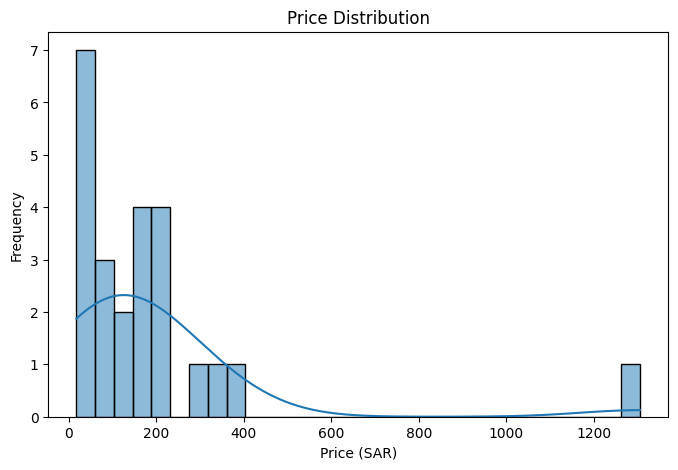

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(platinumlist_activites['price'].dropna(), bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (SAR)")
plt.ylabel("Frequency")
plt.show()

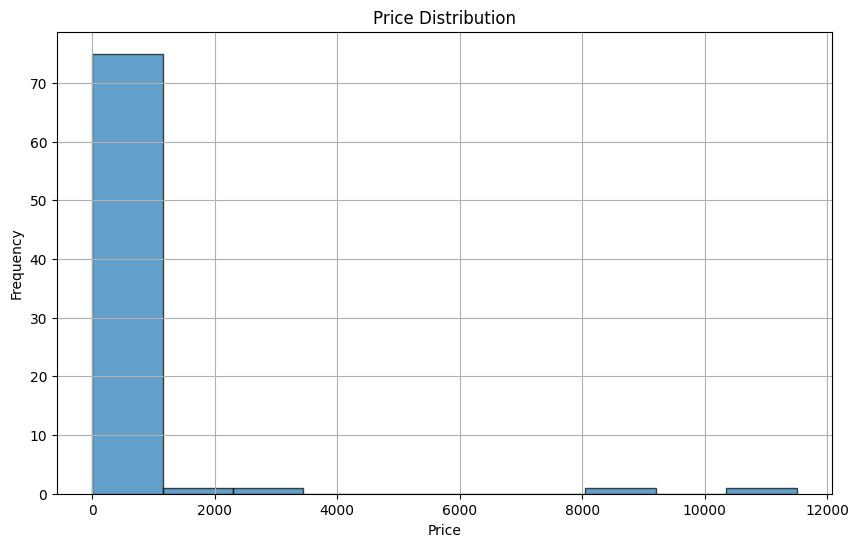

In [ ]:
# price on event from webook
plt.figure(figsize=(10, 6))
plt.hist(event_from_webook['price'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

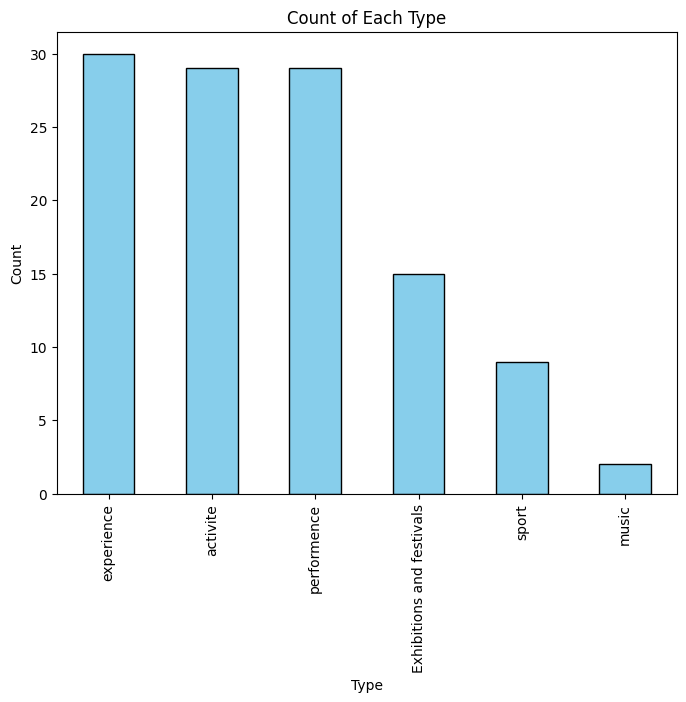

In [ ]:
# Step 1: Count the occurrences of each category in 'type'
type_counts = all_clean_events['type'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 3: Customize the plot
plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Display the plot
plt.show()

### 2. Univariate Non-Graphical analysis: 


## 4. Bivariate/Multivariate Analysis:


### 1. Bivariate/Multivariat Graphical Analysis:

### 2. Bivariate/Multivariat Non-Graphical analysis: